# My sequence

In [1]:

import sys
sys.path.append('..')
from assignment3.iteration import EMProcess
from assignment3.evaluator import Evaluator
from assignment3.utils import *


In [2]:

files = ['../data/my.fasta']
sequences = get_seqs_from_files(files)
k = 5
background = [0.25]*4
pseudo_counts = get_pseudo_count_vector()
print('pseudo_counts = ', pseudo_counts)

pseudo_counts =  [0.0625, 0.0625, 0.0625, 0.0625]


# EM

In [30]:
seeds = get_seed_kmers(sequences[0] ,k)

processes = []
for seed in seeds:

    process = EMProcess(sequences, k , background)
    processes.append(process)
    process.initialize(seed,pseudo_counts)

    for i in range(3):
        process.iterate()


For each of the S seed WMMs defined in "Initialization," do three E-step/M-step pairs. Among the resulting S WMMs, select three WMMs: the ones attaining the highest entropy (relative to background), the median entropy, and the lowest entropy. Call these WMMs A, B and C, respectively. Run an additional 7 E-step/M-step pairs on all S of the third-round WMMs (a total of 10 E-M rounds on each). Select as your final "motif" the best (highest entropy) of the S candidates after round 10; call this WMM D.

As a simple descriptive summary of this process, print in a tidy-ish S row by 11 column table the entropies of each seed WMM and its 10 successive E-M-refined iterates. Also print the frequency matrices for WMMs A, B, C, and D.

In [31]:
entropies = np.array([p.wmm.entropy for p in processes])


highest, median, lowest = np.argmax(entropies), np.argsort(entropies)[len(entropies)//2], np.argmin(entropies)
print('highest, median, lowest = ',highest, median, lowest)
print(entropies)

highest, median, lowest =  25 24 19
[4.44612855 4.23058597 4.57916413 3.35589977 4.57972012 4.79489905
 4.2262213  3.48885414 3.80025088 3.26156841 2.63568662 3.2527913
 3.63007053 4.67858413 3.65428348 4.32359575 5.70965336 6.38083563
 6.14877664 1.17005007 3.1512185  2.50799335 2.66474723 2.63561454
 4.20256397 7.70066194]


In [32]:
import copy
A, B, C = processes[highest].wmm, processes[median].wmm, processes[lowest].wmm
A,B,C = copy.deepcopy(A),copy.deepcopy(B),copy.deepcopy(C)


In [33]:
A

,1,2,3,4,5
A,1.942511,-4.361989,-4.340921,-4.319621,-3.981071
C,-4.362461,-4.390951,1.791717,-4.338633,-4.380189
G,-4.143794,-1.141379,-4.173058,1.945710,1.935409
T,-4.291303,1.786755,-1.207718,-4.374180,-3.970587


### Additional 7 rounds 

In [34]:
for process in processes:
    for i in range(7):
        process.iterate()

In [35]:
entropies_7 = np.array([p.wmm.entropy for p in processes])
print(entropies_7)
D = processes[np.argmax(entropies_7)].wmm
print(D.entropy)

[7.7671202  4.73453939 6.00122673 6.3613387  5.40992156 5.81927413
 5.14049001 5.21633825 5.06502866 7.2652185  5.57015412 3.91262186
 5.80881014 6.16870869 6.2072426  5.75280223 6.3002866  6.81149818
 6.19996876 2.92664056 4.30149265 7.64834989 5.55199916 4.24211948
 5.56548872 7.71381385]
7.767120196363531


In [36]:
A

,1,2,3,4,5
A,1.942511,-4.361989,-4.340921,-4.319621,-3.981071
C,-4.362461,-4.390951,1.791717,-4.338633,-4.380189
G,-4.143794,-1.141379,-4.173058,1.945710,1.935409
T,-4.291303,1.786755,-1.207718,-4.374180,-3.970587


# Plot Scores

 Evaluating for seed 0


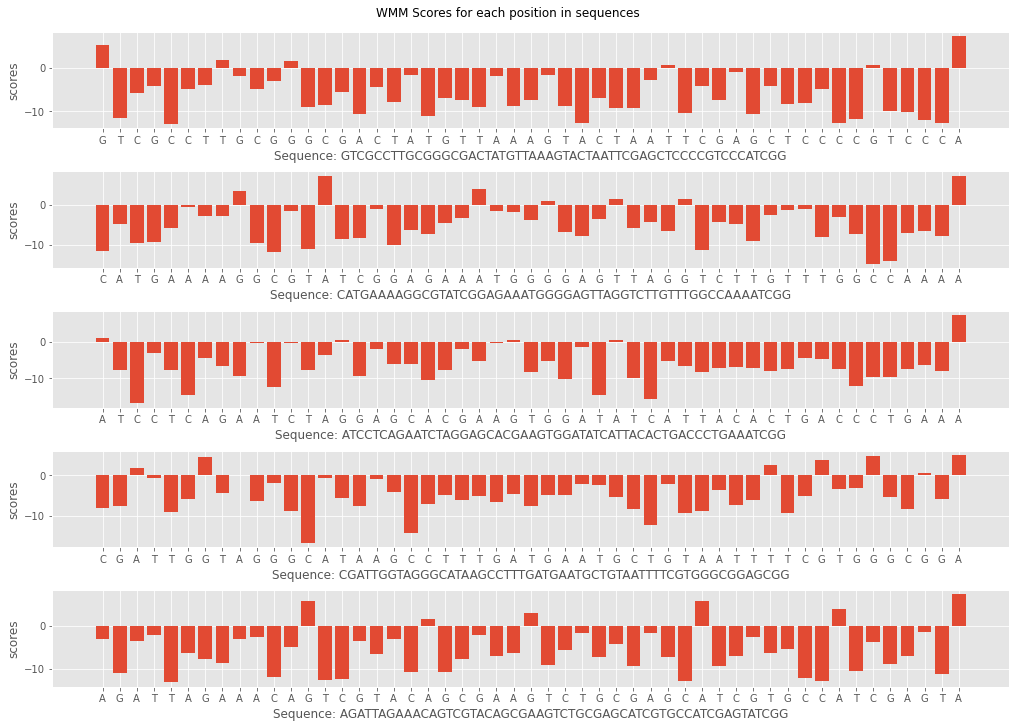

 Evaluating for seed 1


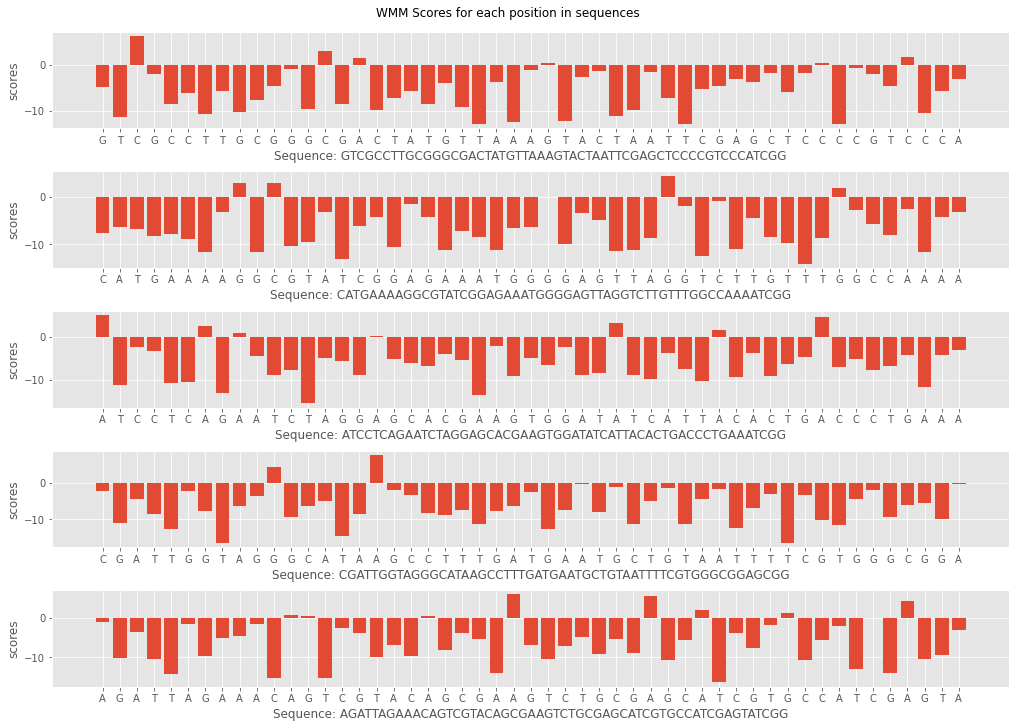

 Evaluating for seed 2


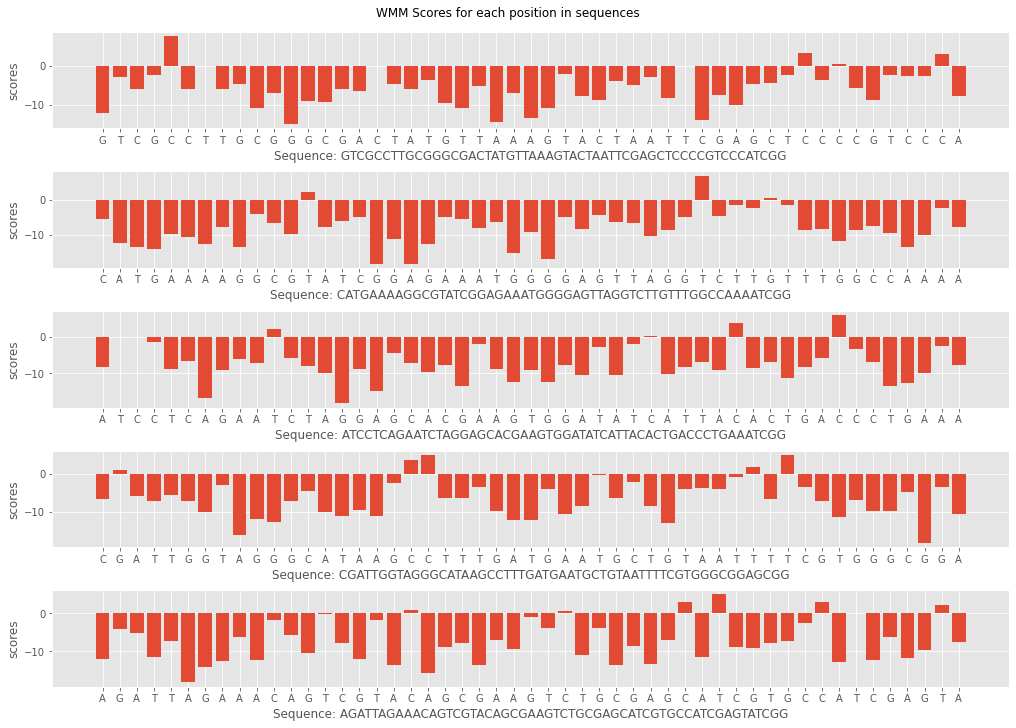

 Evaluating for seed 3


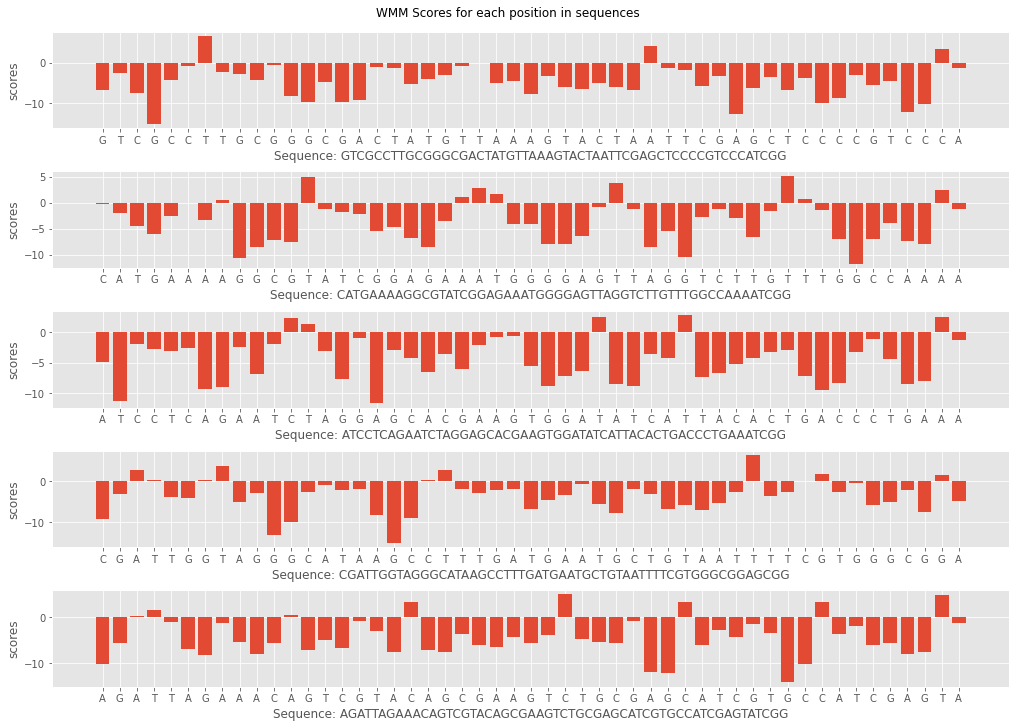

 Evaluating for seed 4


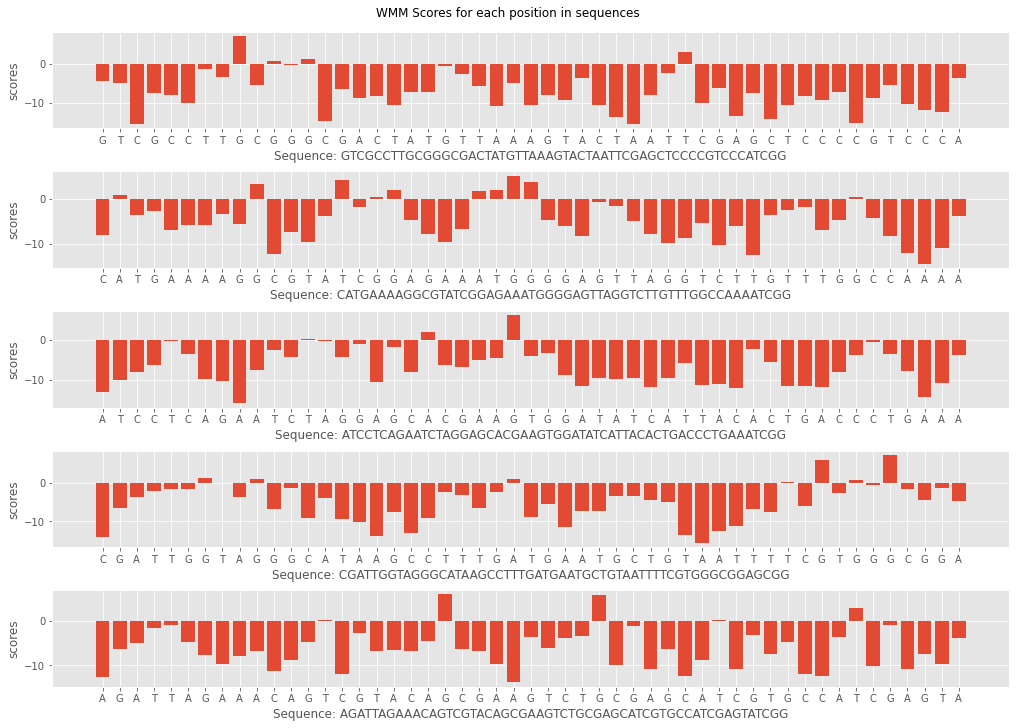

 Evaluating for seed 5


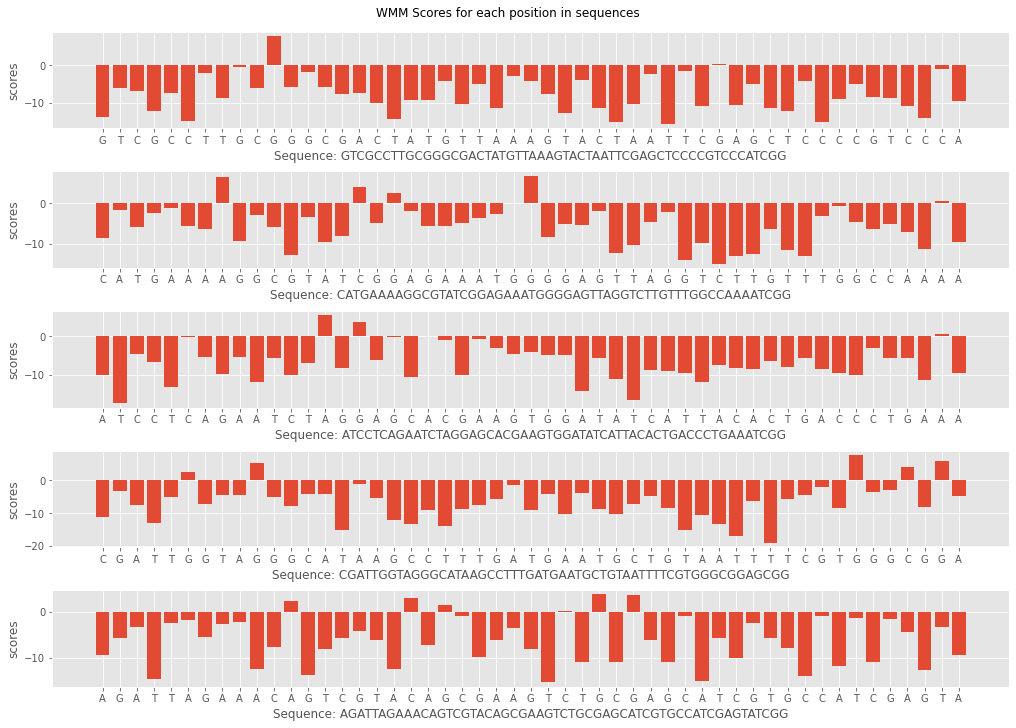

 Evaluating for seed 6


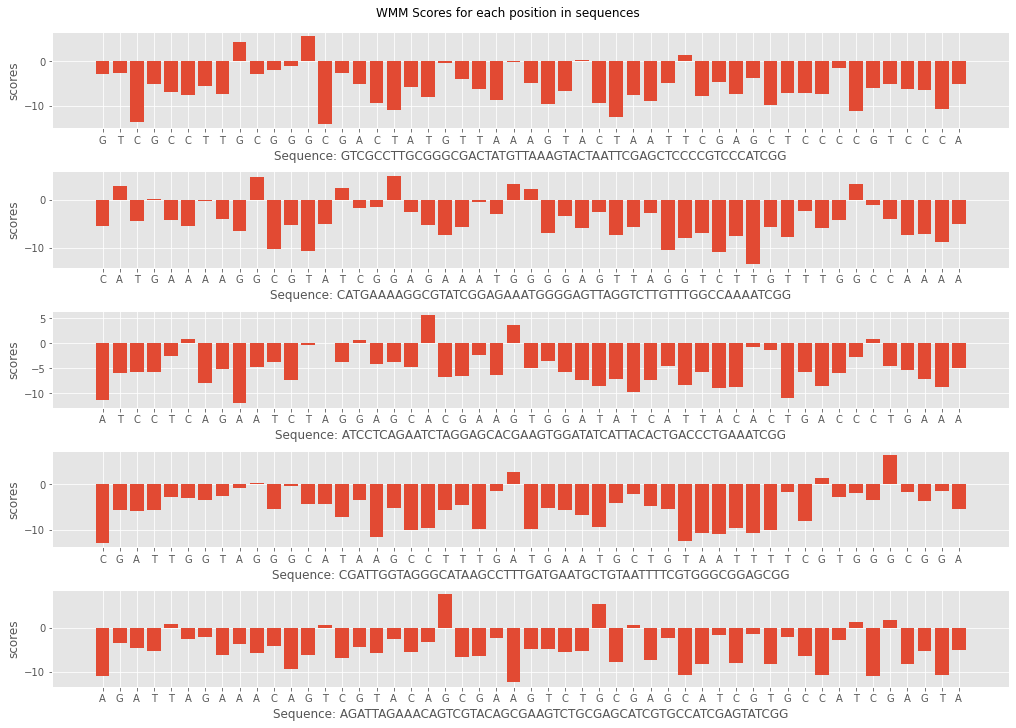

 Evaluating for seed 7


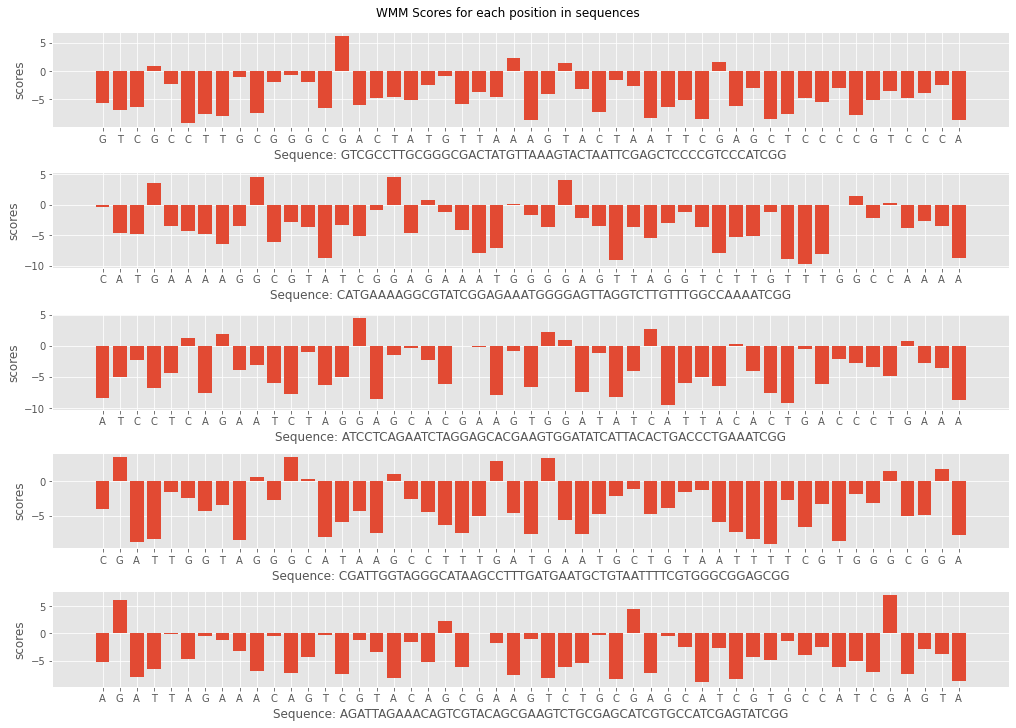

 Evaluating for seed 8


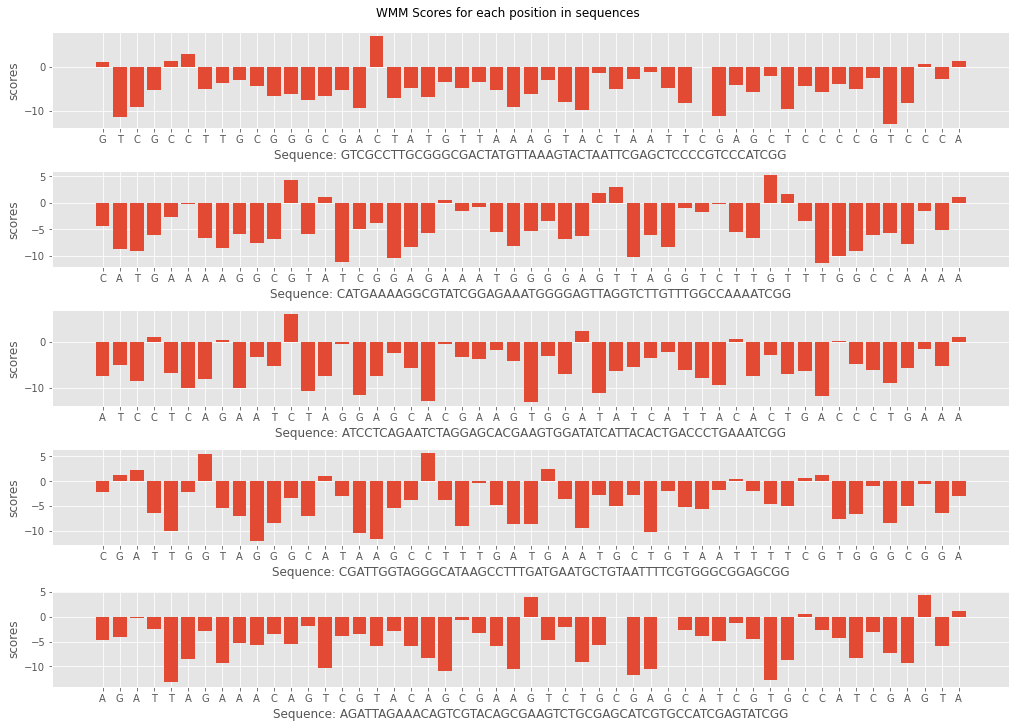

 Evaluating for seed 9


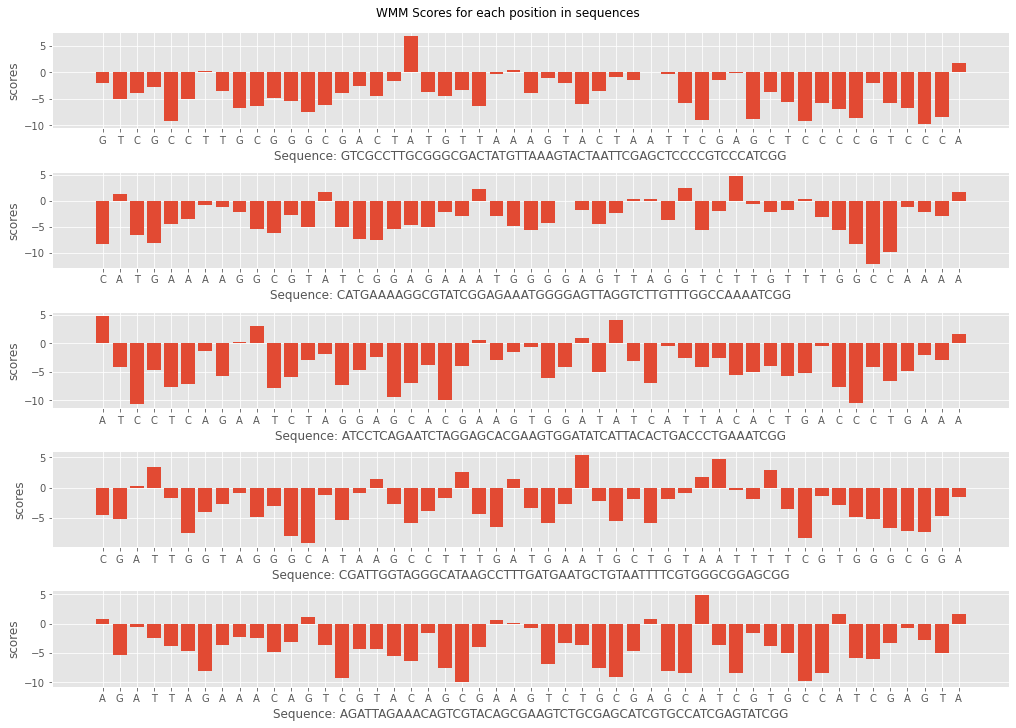

 Evaluating for seed 10


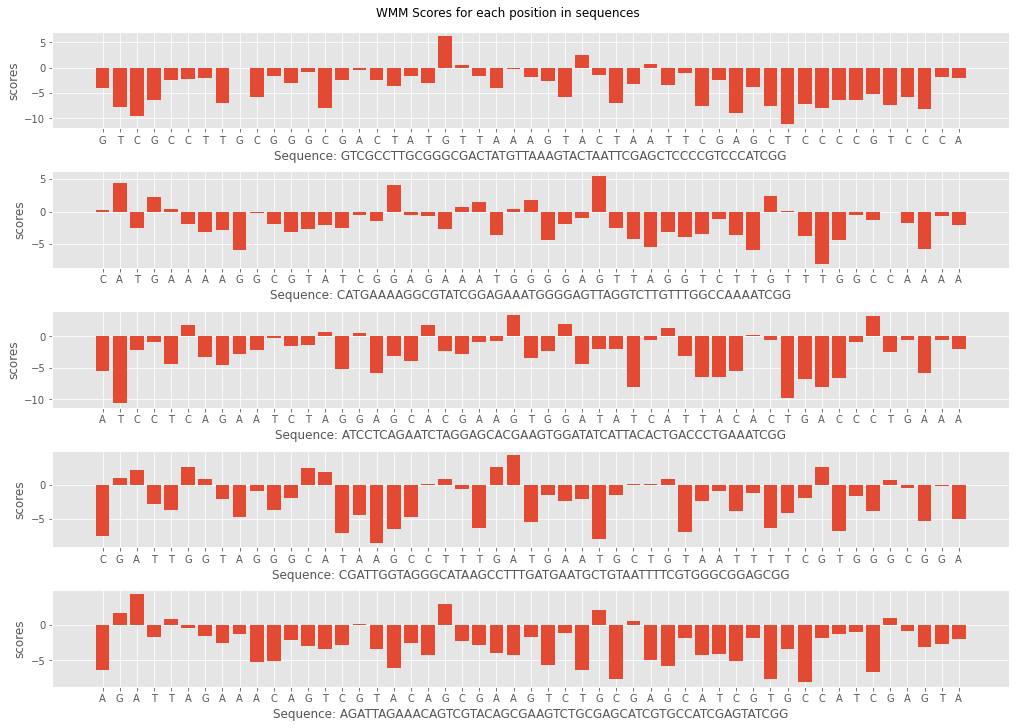

 Evaluating for seed 11


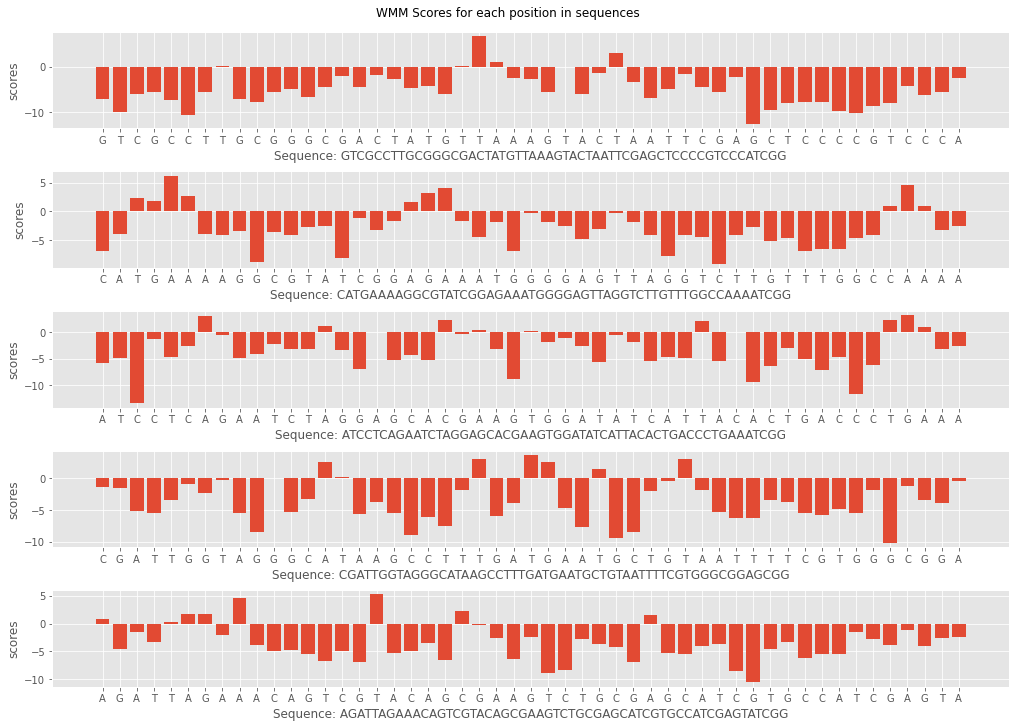

 Evaluating for seed 12


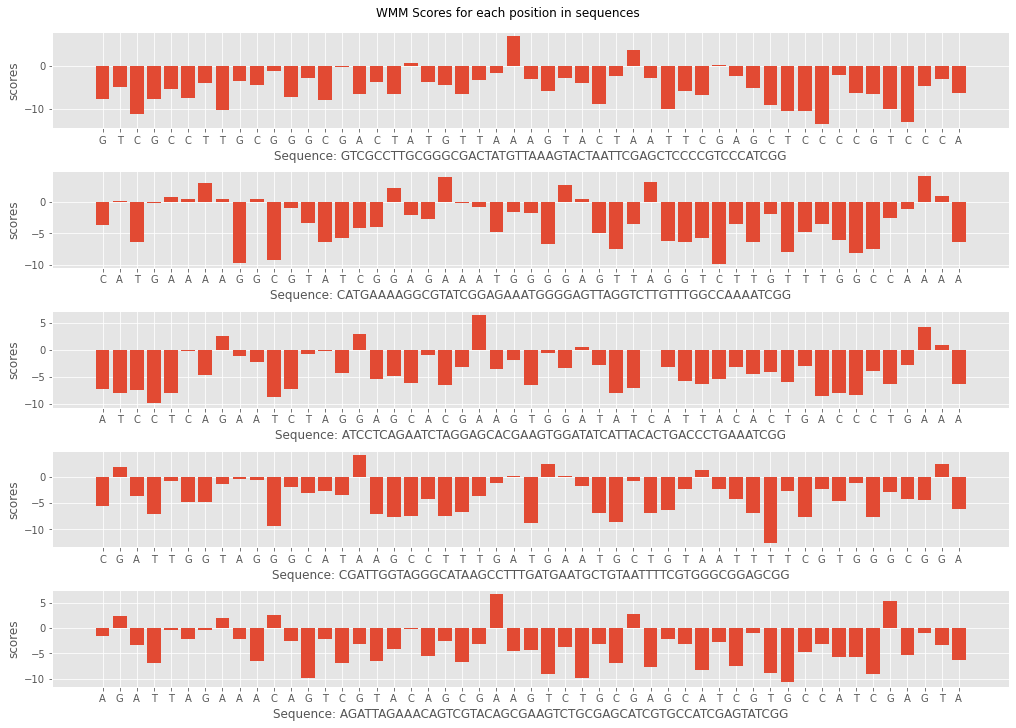

 Evaluating for seed 13


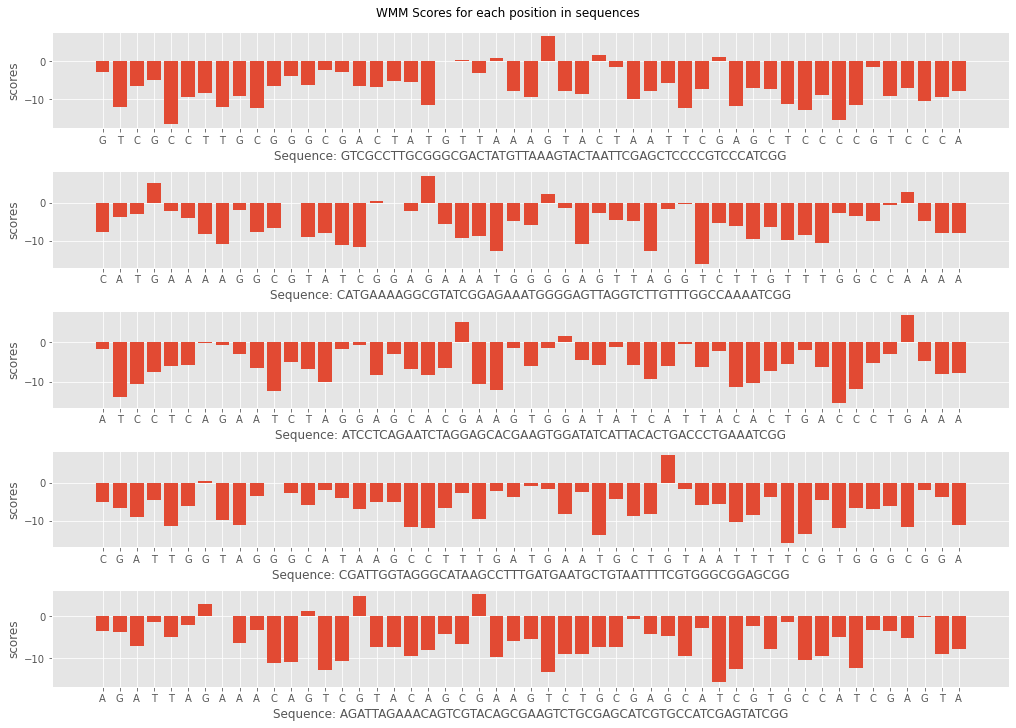

 Evaluating for seed 14


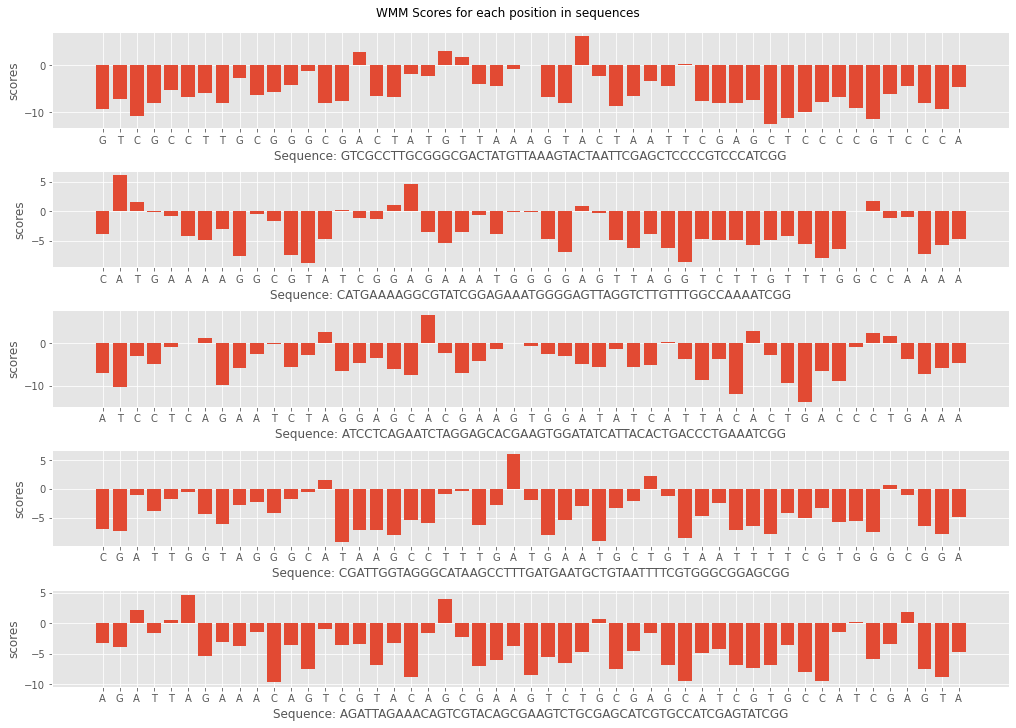

 Evaluating for seed 15


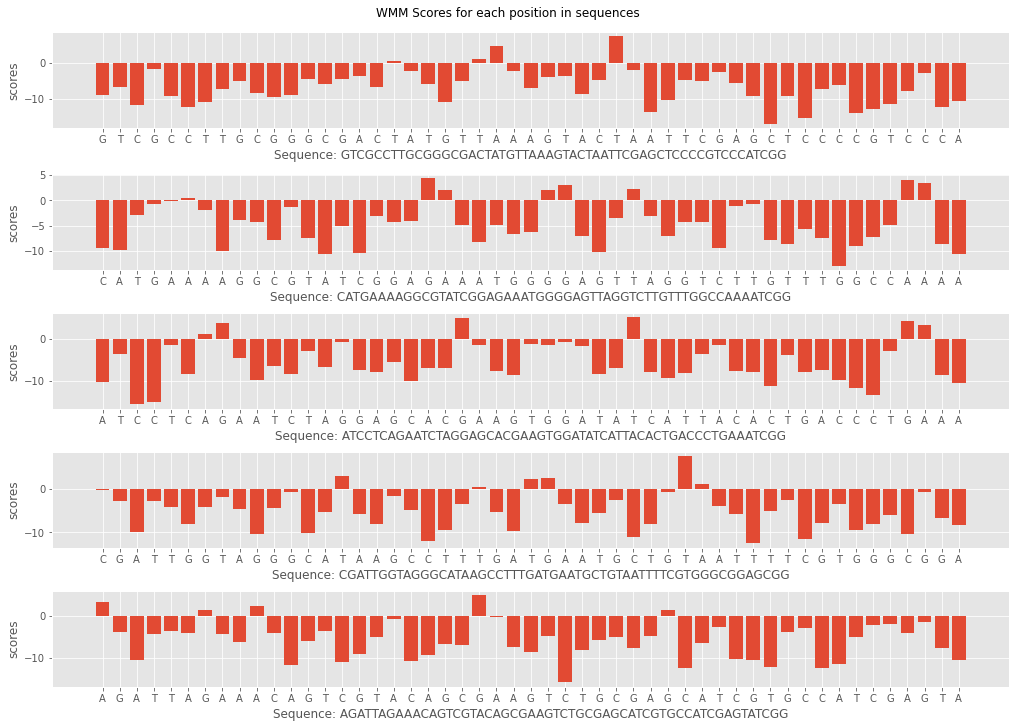

 Evaluating for seed 16


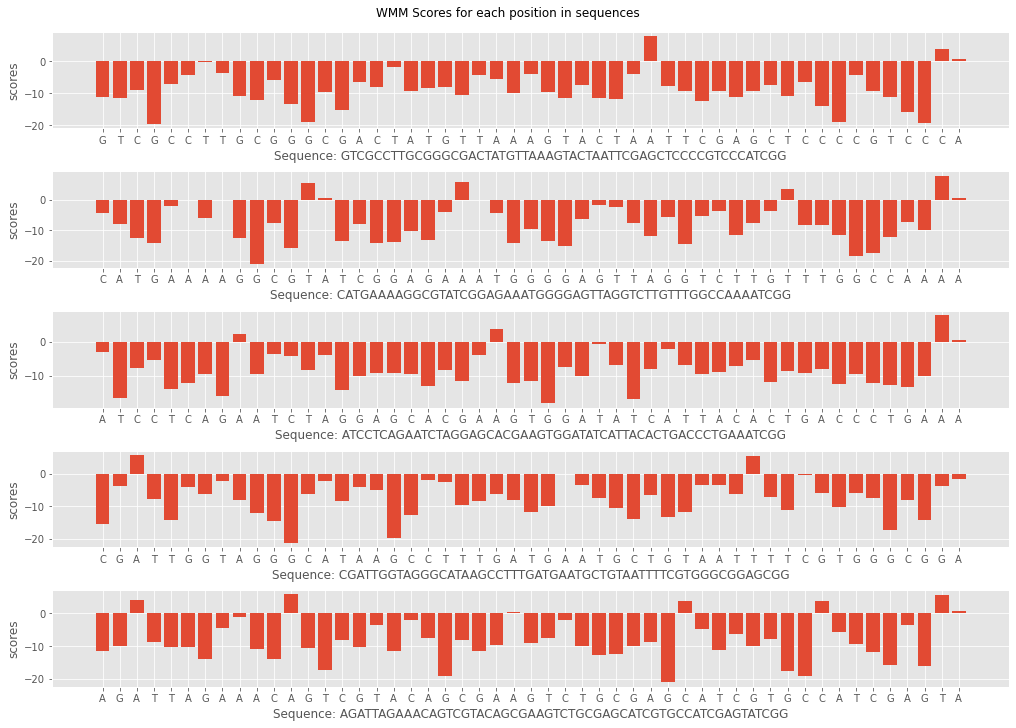

 Evaluating for seed 17


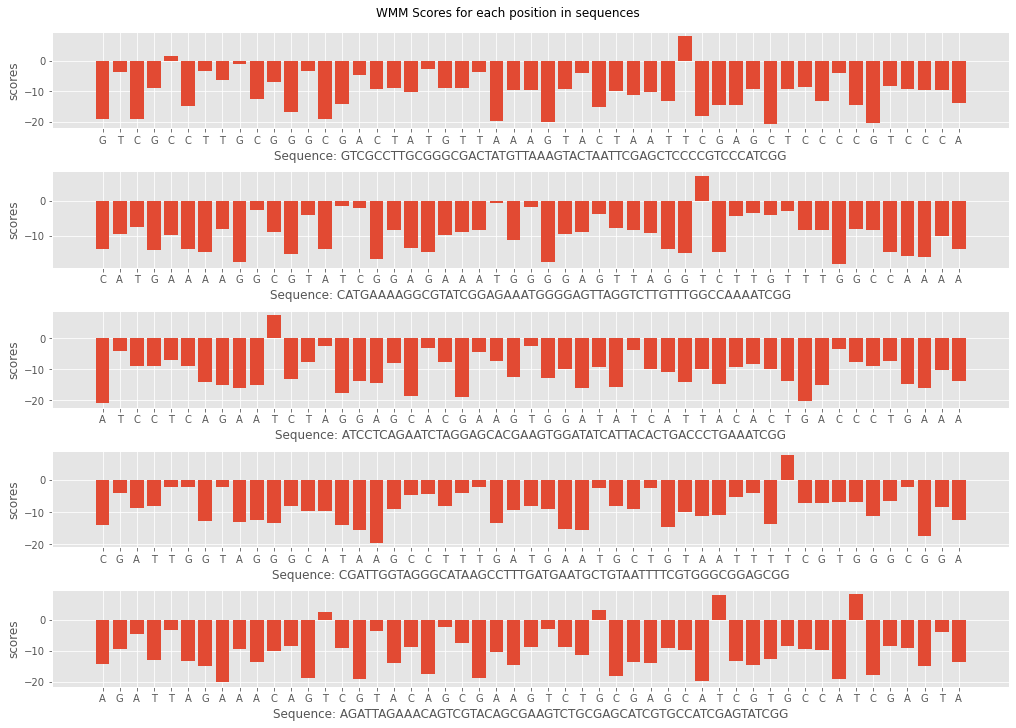

 Evaluating for seed 18


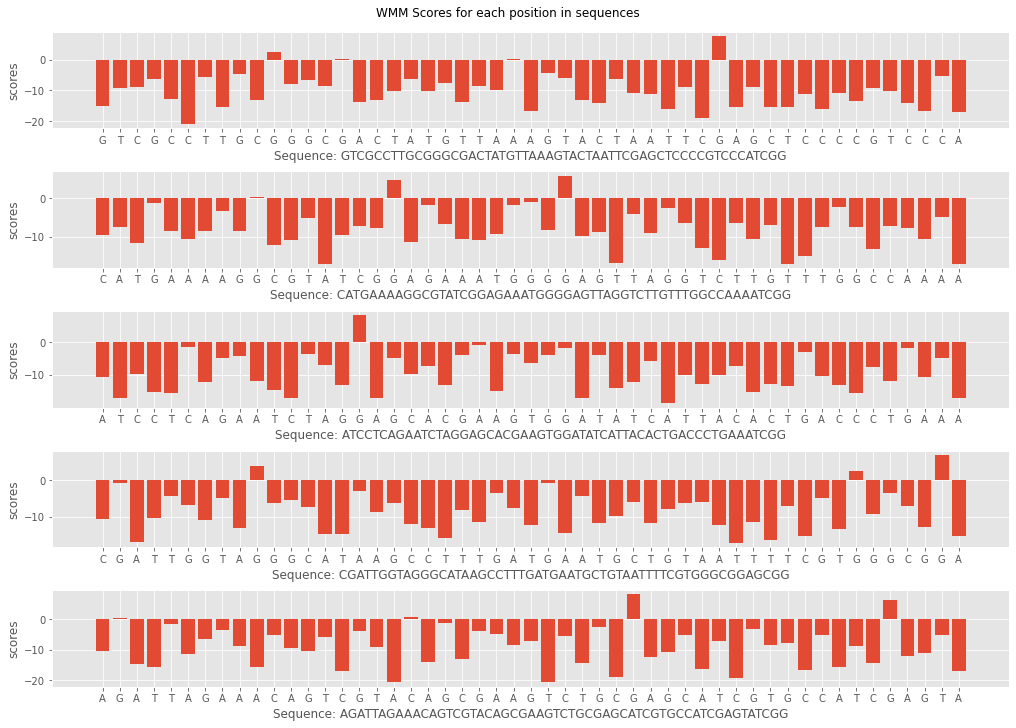

 Evaluating for seed 19


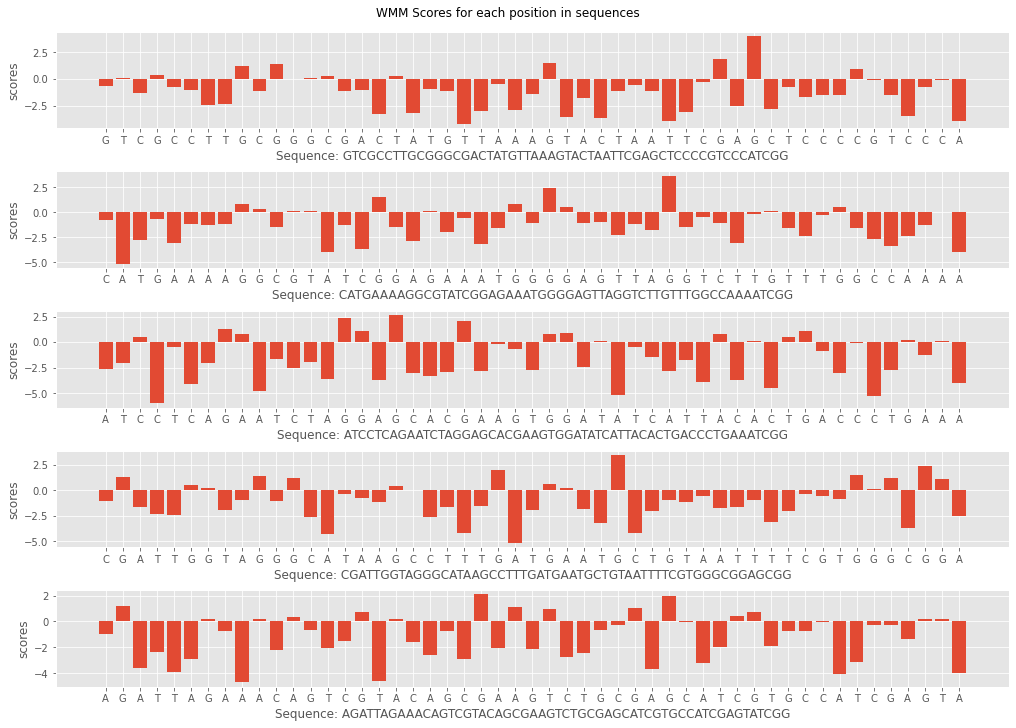

 Evaluating for seed 20


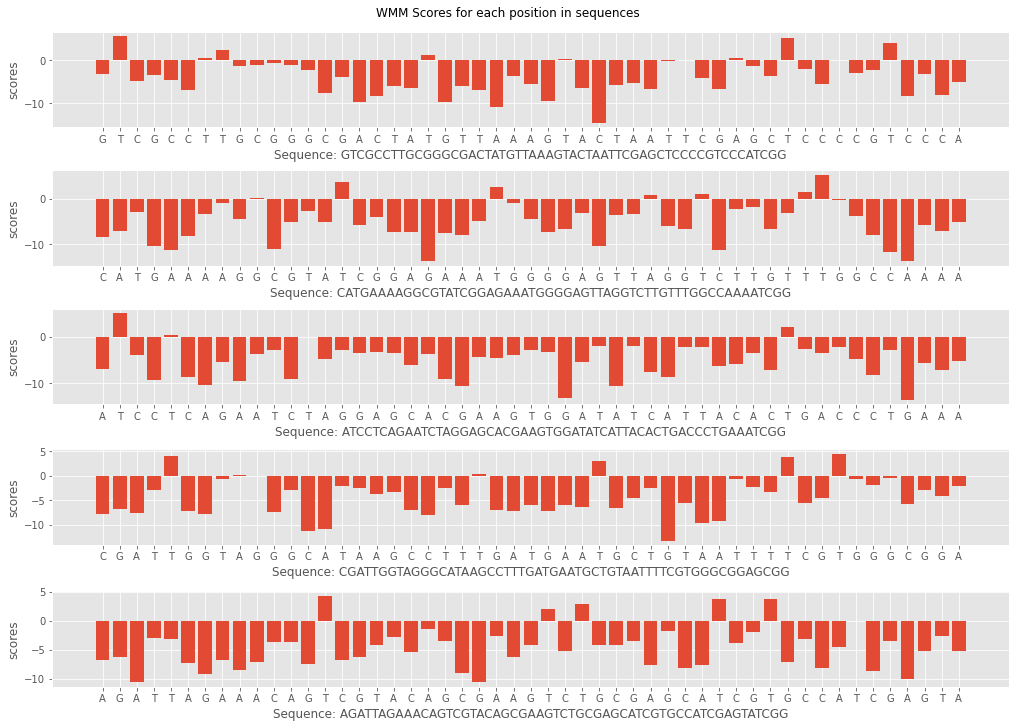

 Evaluating for seed 21


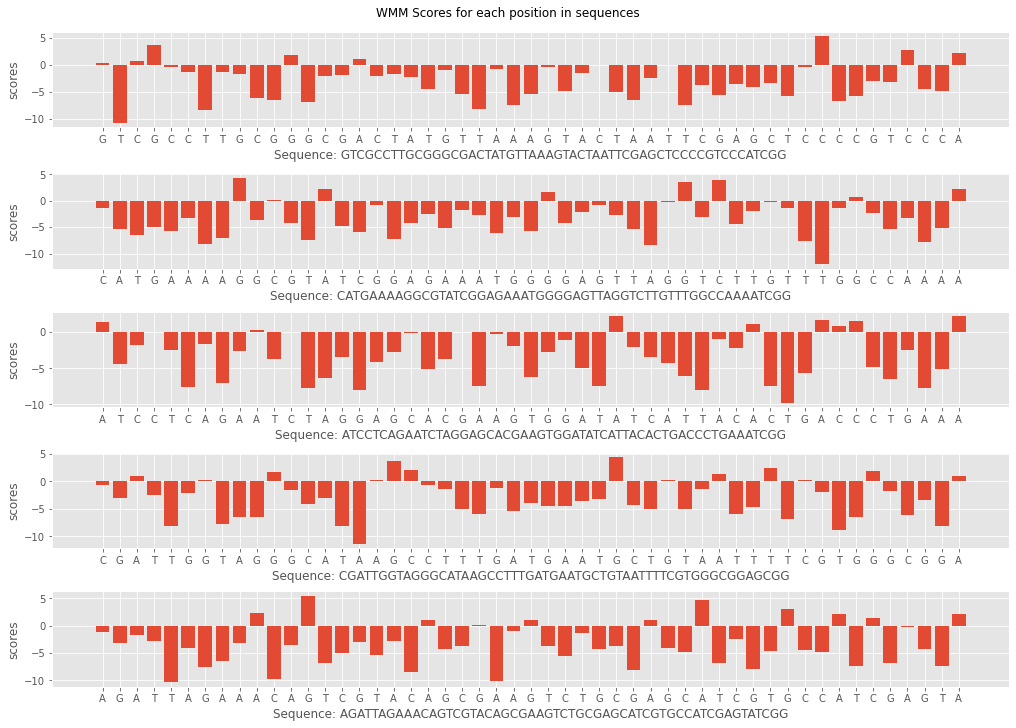

 Evaluating for seed 22


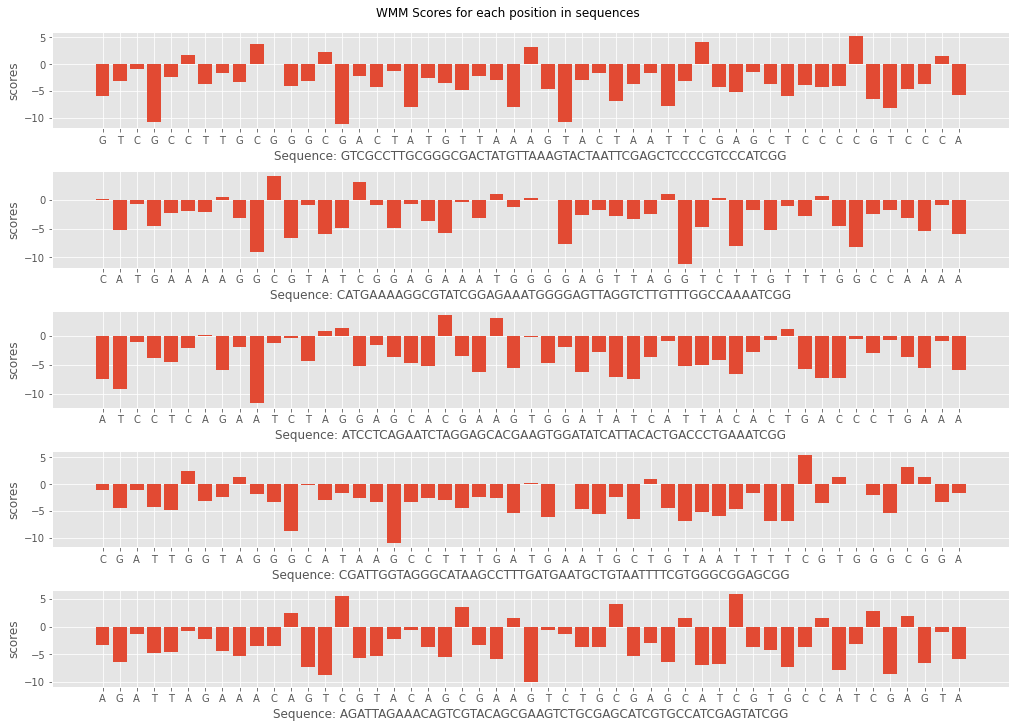

 Evaluating for seed 23


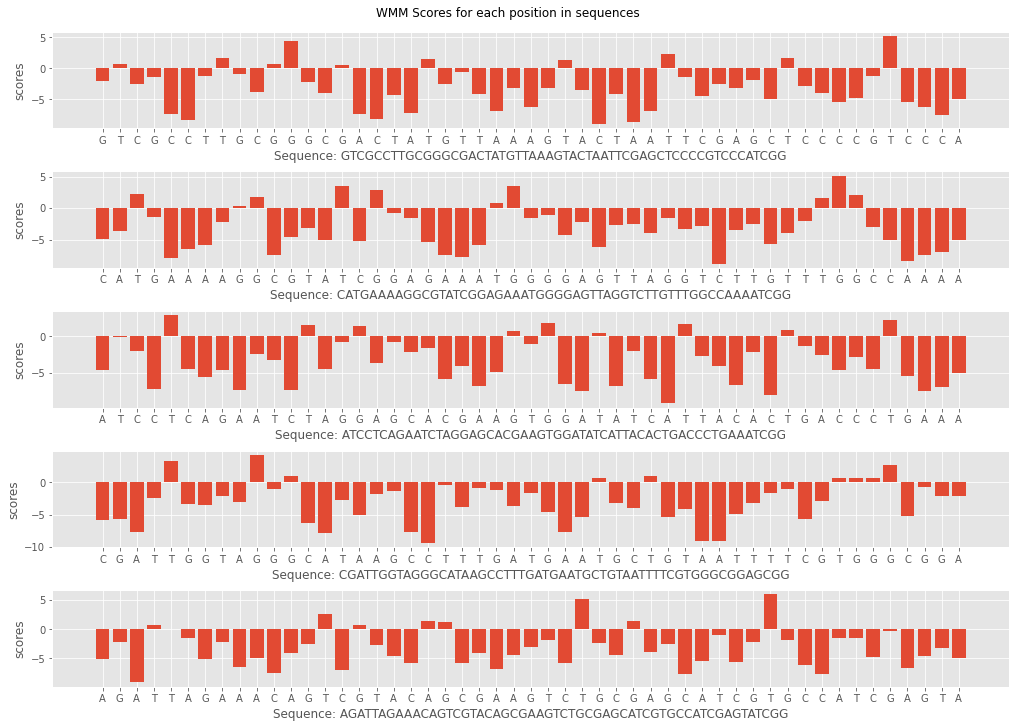

 Evaluating for seed 24


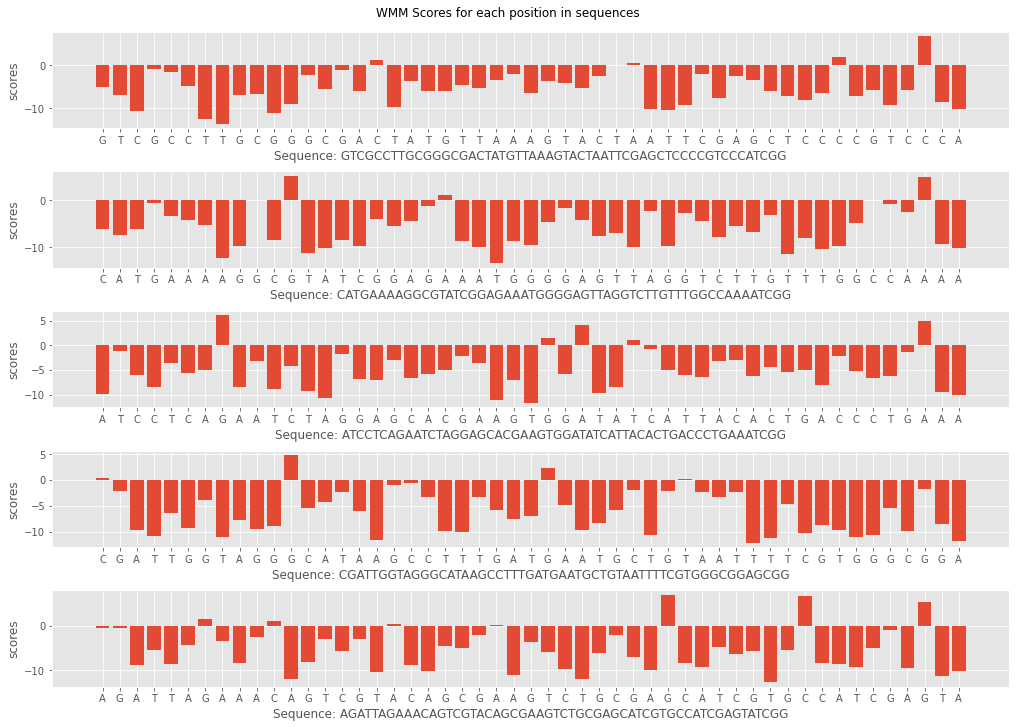

 Evaluating for seed 25


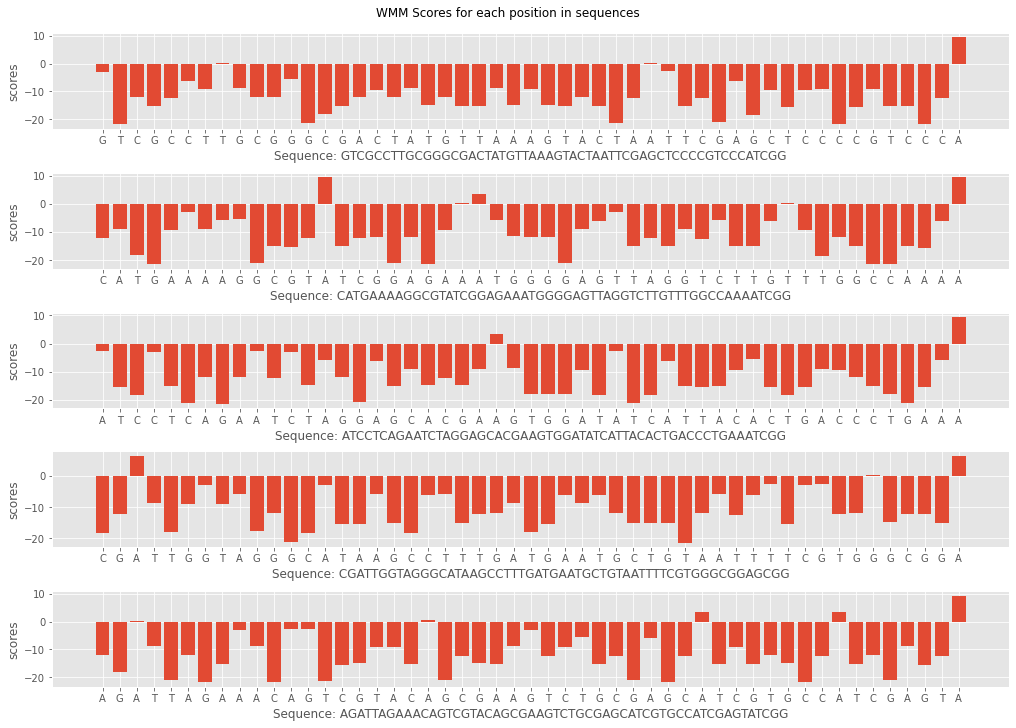

In [4]:
evals = []
test_seq = sequences
for i, process in enumerate(processes):
    print(f' Evaluating for seed {i}')
    eval = Evaluator(process.wmm, test_seq)
    evals.append(eval)
    eval.plot_results()

    # combine scores and create y_true. Calculate ROC

gold_start, gold_end =  49 53
Gold sequence =  ATCGG
High score histogram for seed 0
Most common location of the best motif hit in each sequence = 51


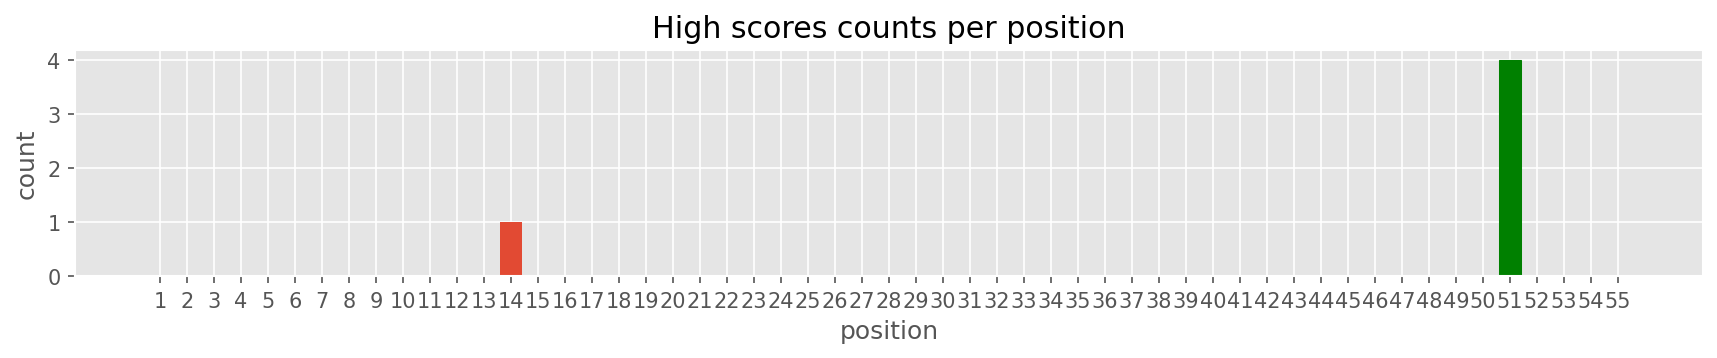

High score histogram for seed 1
Most common location of the best motif hit in each sequence = 1


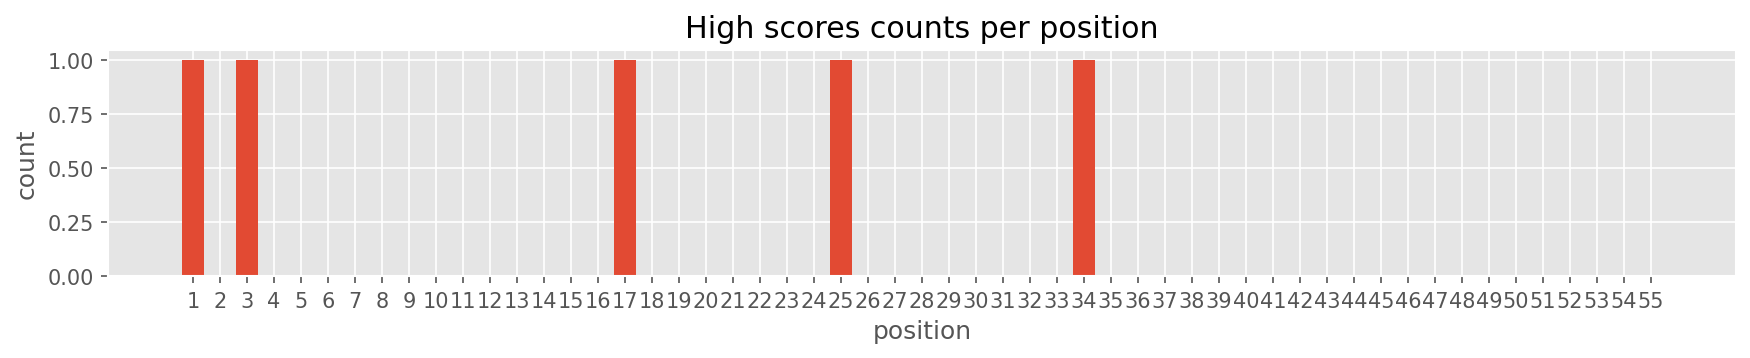

High score histogram for seed 2
Most common location of the best motif hit in each sequence = 5


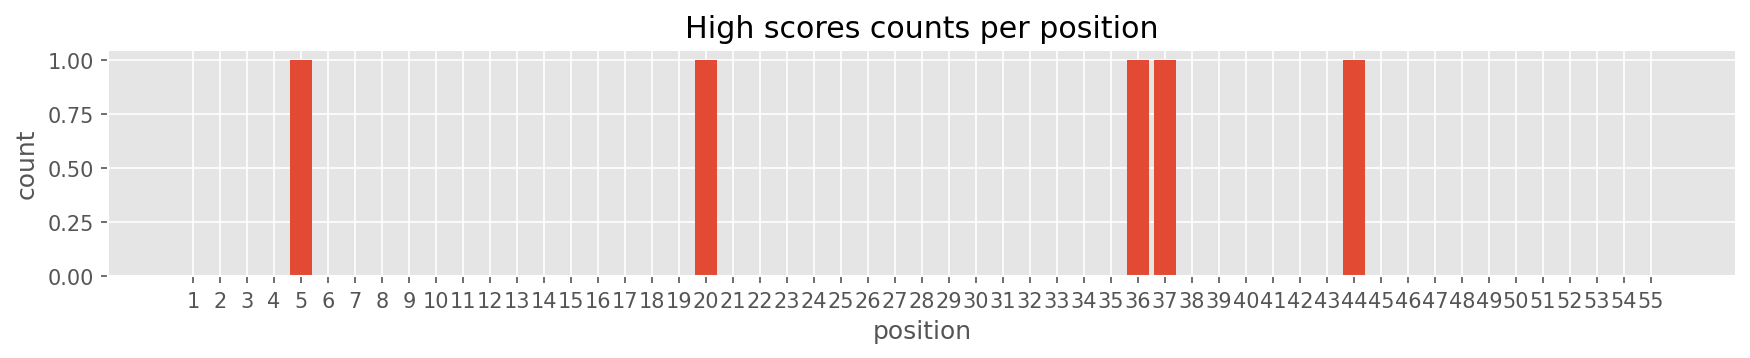

High score histogram for seed 3
Most common location of the best motif hit in each sequence = 7


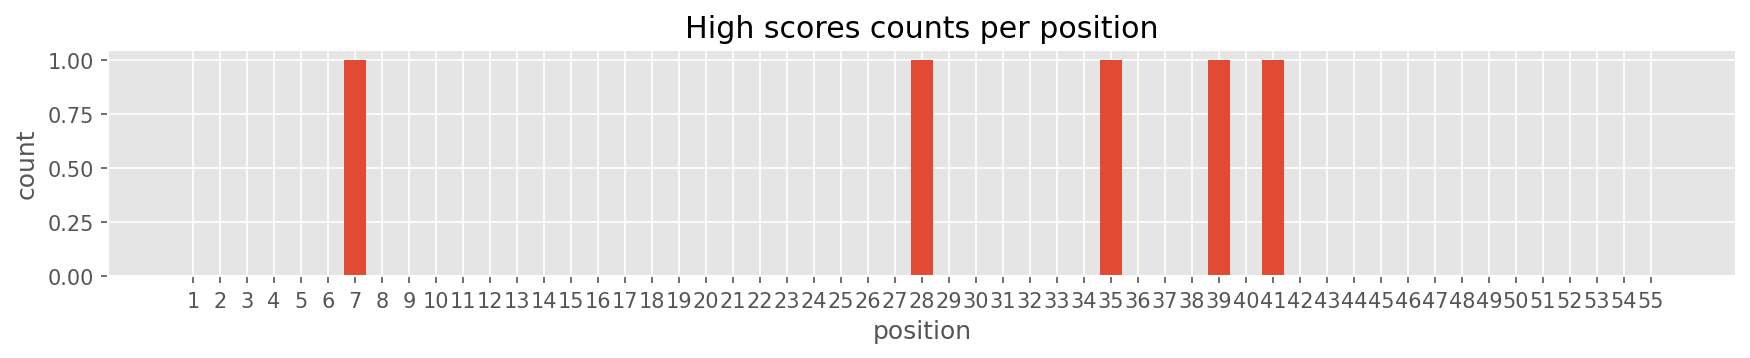

High score histogram for seed 4
Most common location of the best motif hit in each sequence = 25


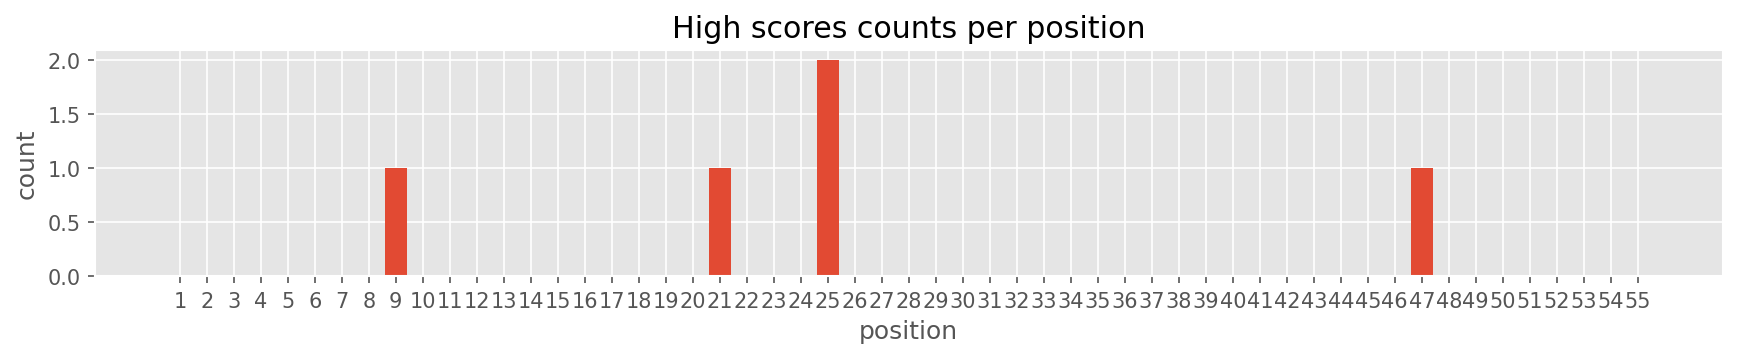

High score histogram for seed 5
Most common location of the best motif hit in each sequence = 11


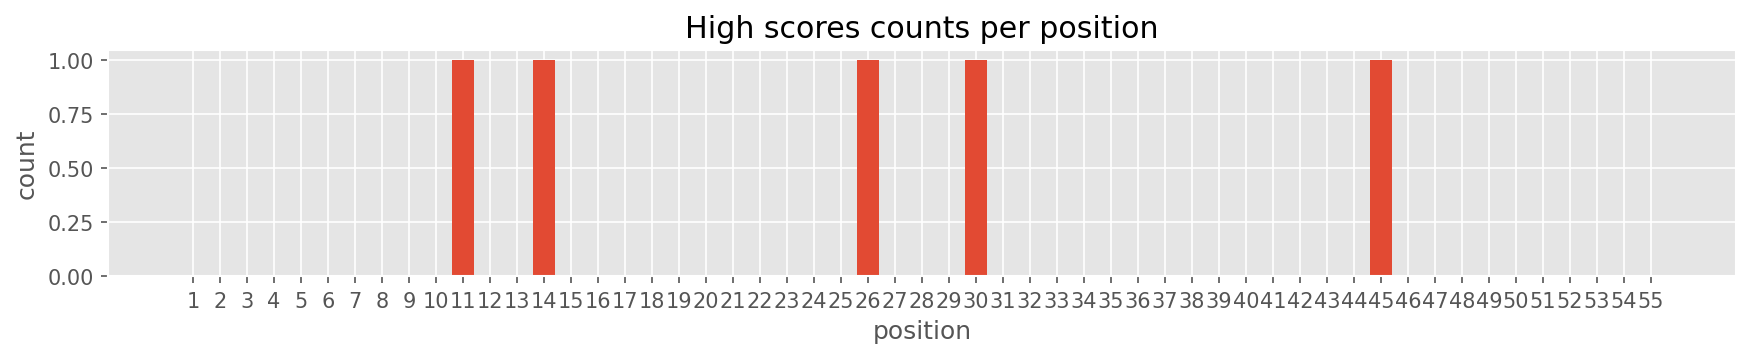

High score histogram for seed 6
Most common location of the best motif hit in each sequence = 13


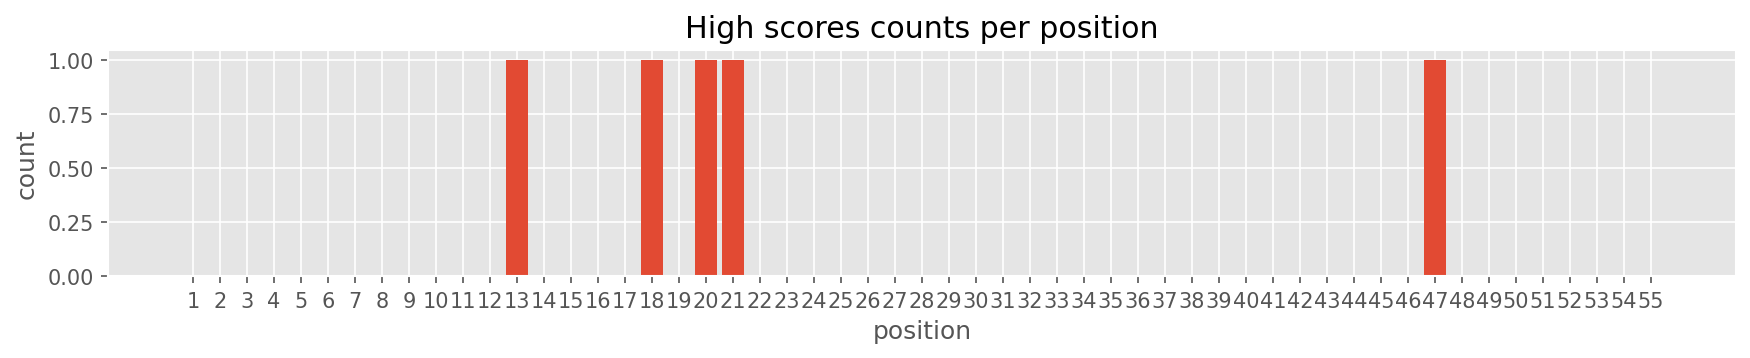

High score histogram for seed 7
Most common location of the best motif hit in each sequence = 12


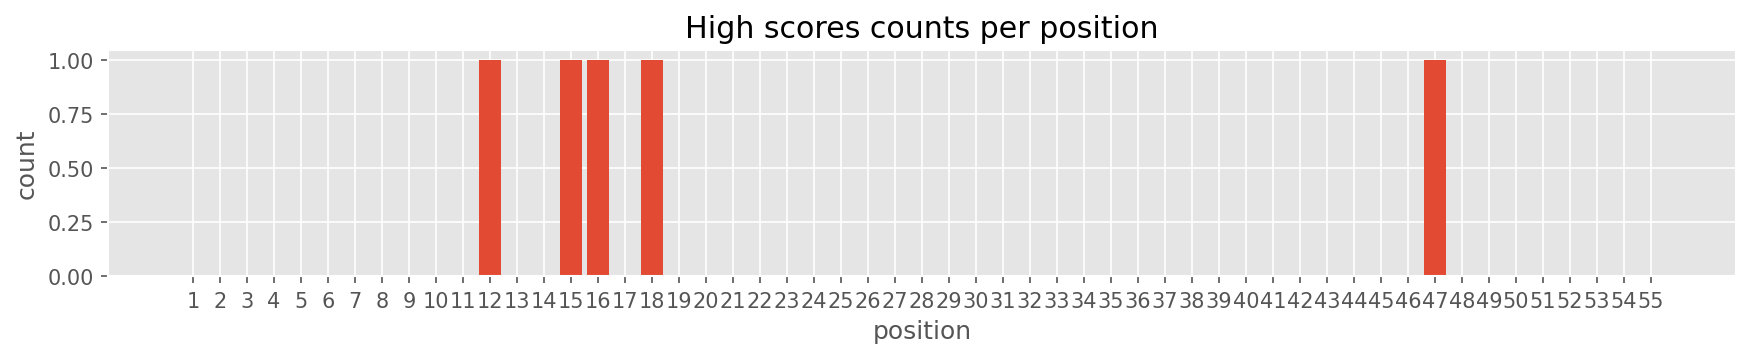

High score histogram for seed 8
Most common location of the best motif hit in each sequence = 12


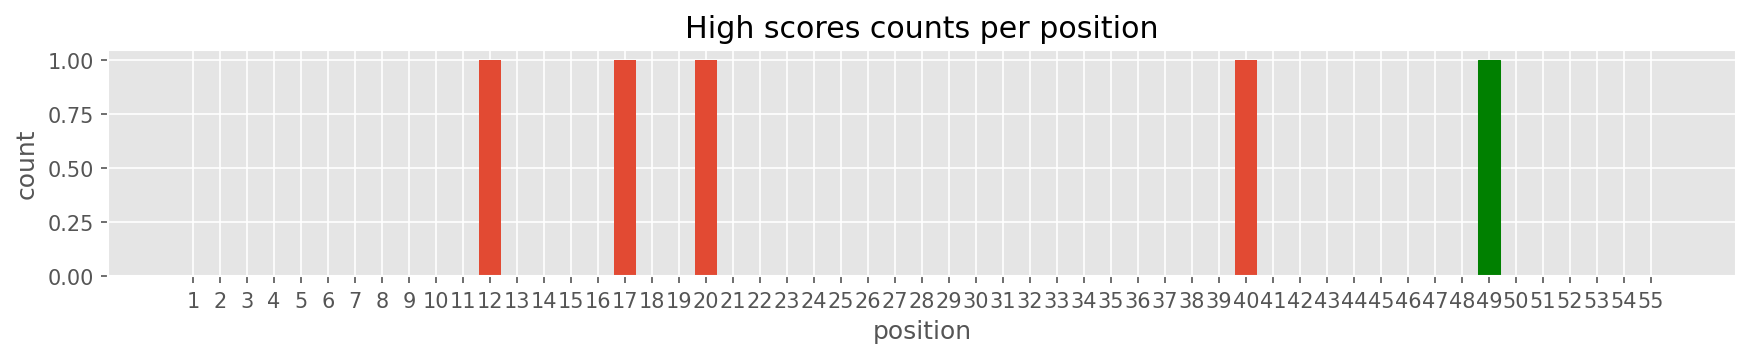

High score histogram for seed 9
Most common location of the best motif hit in each sequence = 1


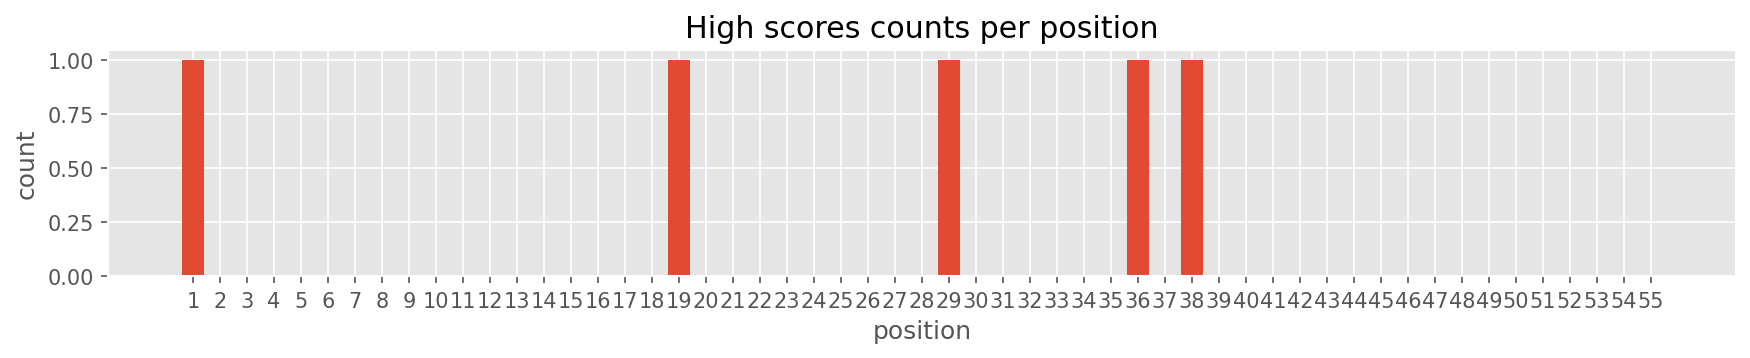

High score histogram for seed 10
Most common location of the best motif hit in each sequence = 25


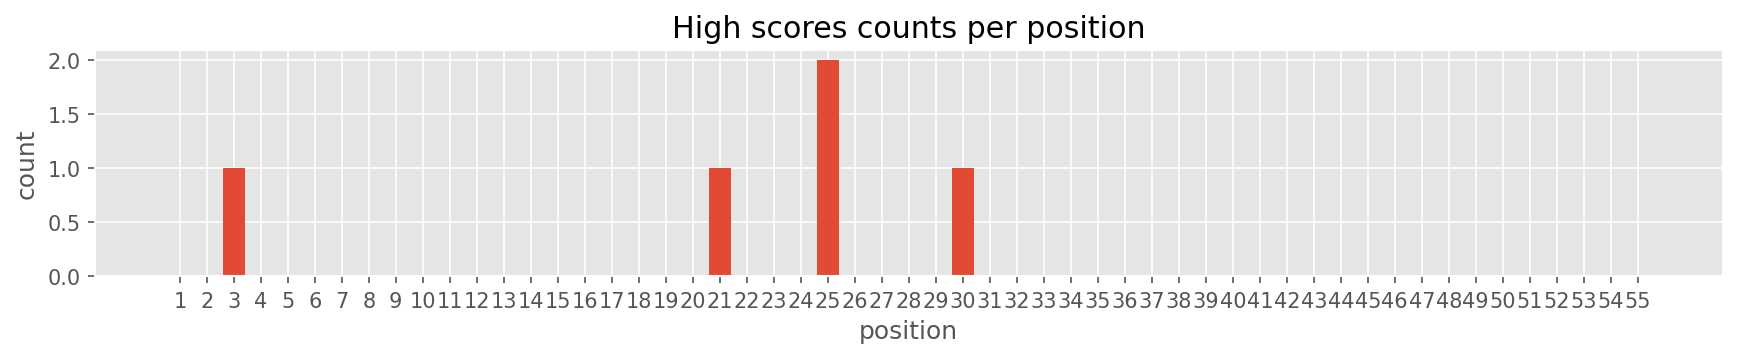

High score histogram for seed 11
Most common location of the best motif hit in each sequence = 5


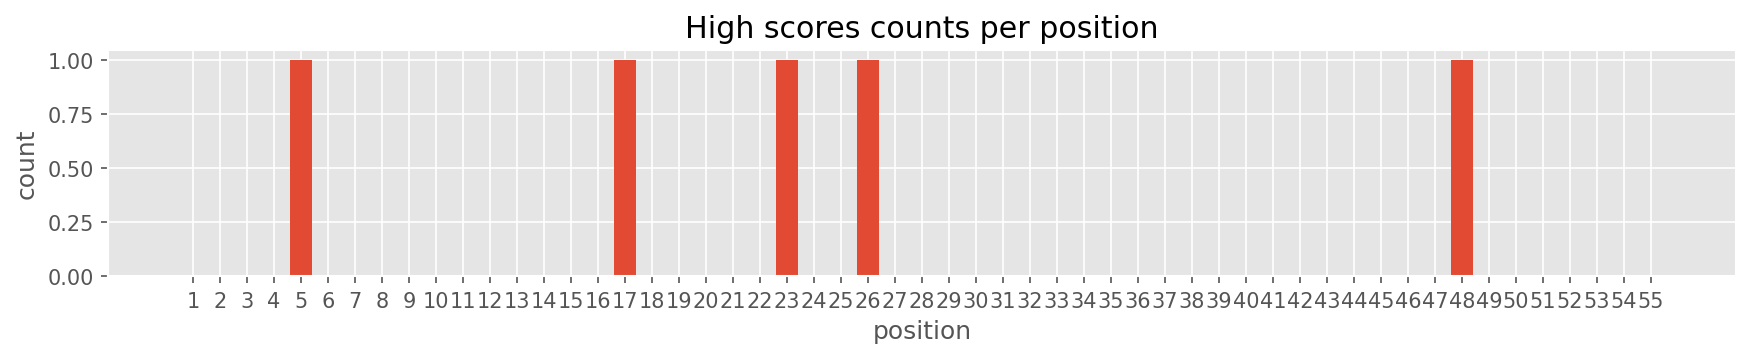

High score histogram for seed 12
Most common location of the best motif hit in each sequence = 16


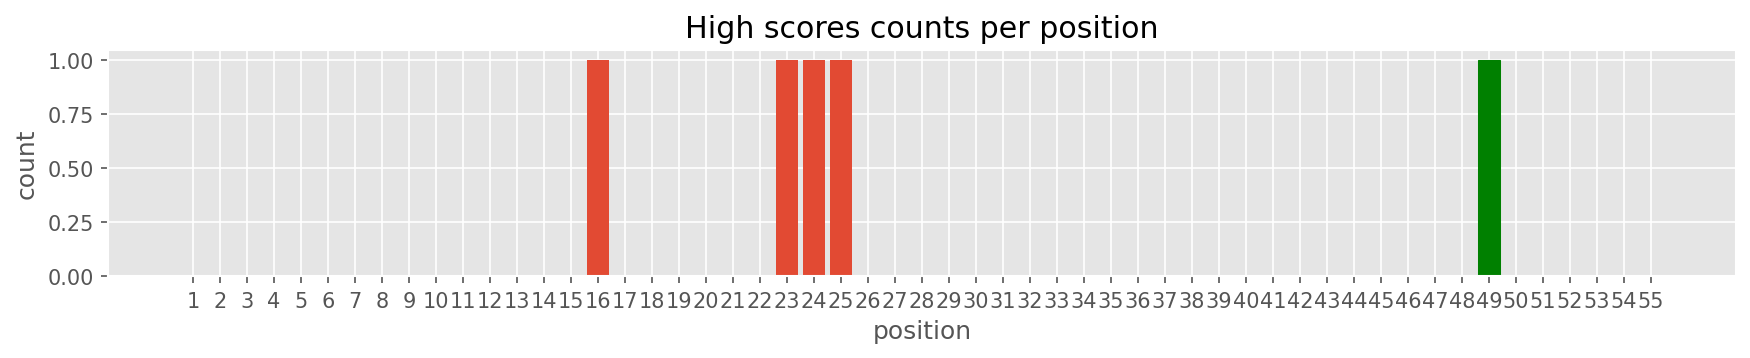

High score histogram for seed 13
Most common location of the best motif hit in each sequence = 20


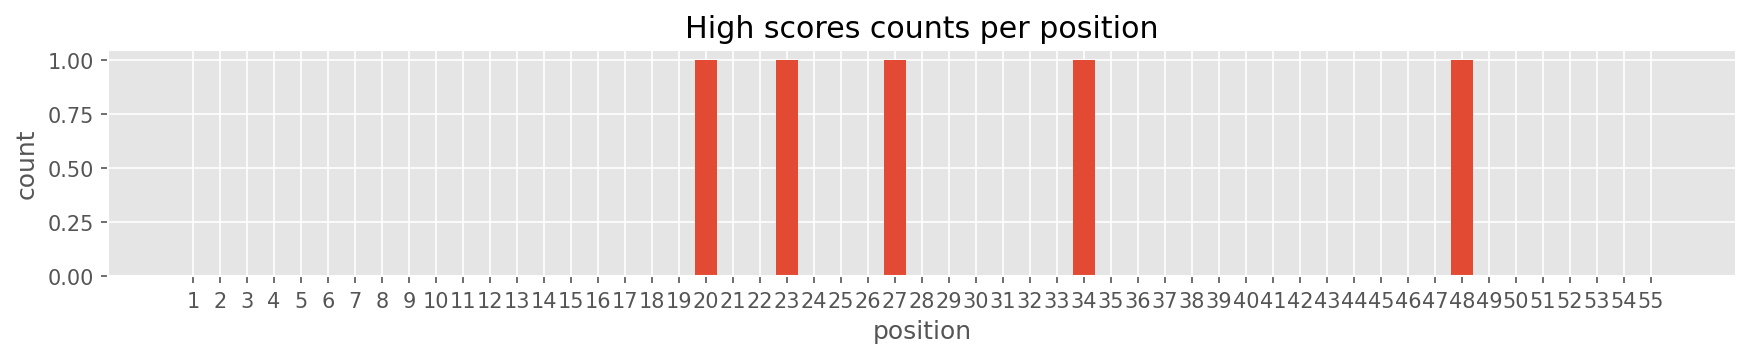

High score histogram for seed 14
Most common location of the best motif hit in each sequence = 2


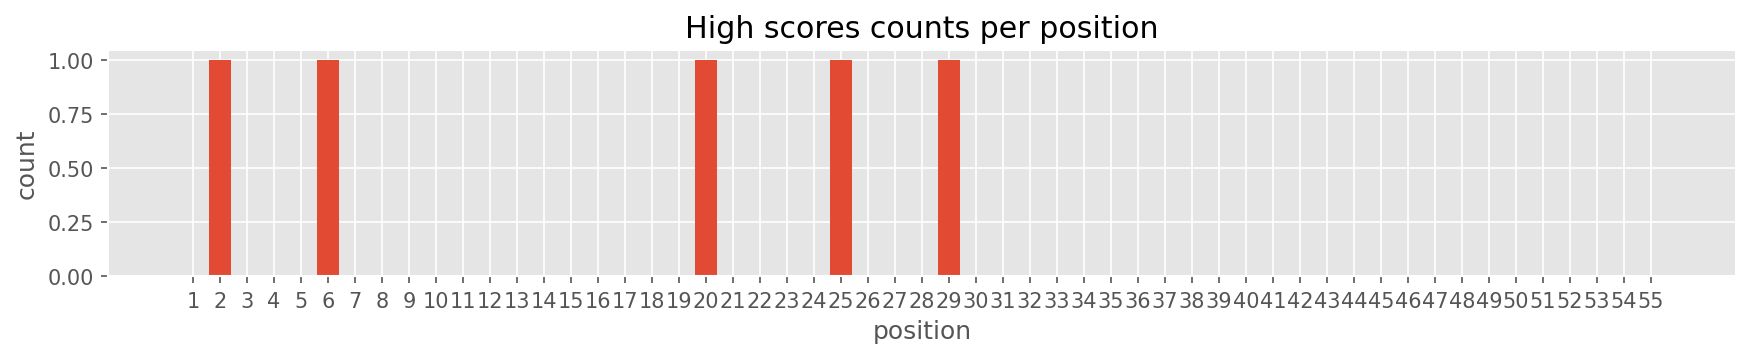

High score histogram for seed 15
Most common location of the best motif hit in each sequence = 20


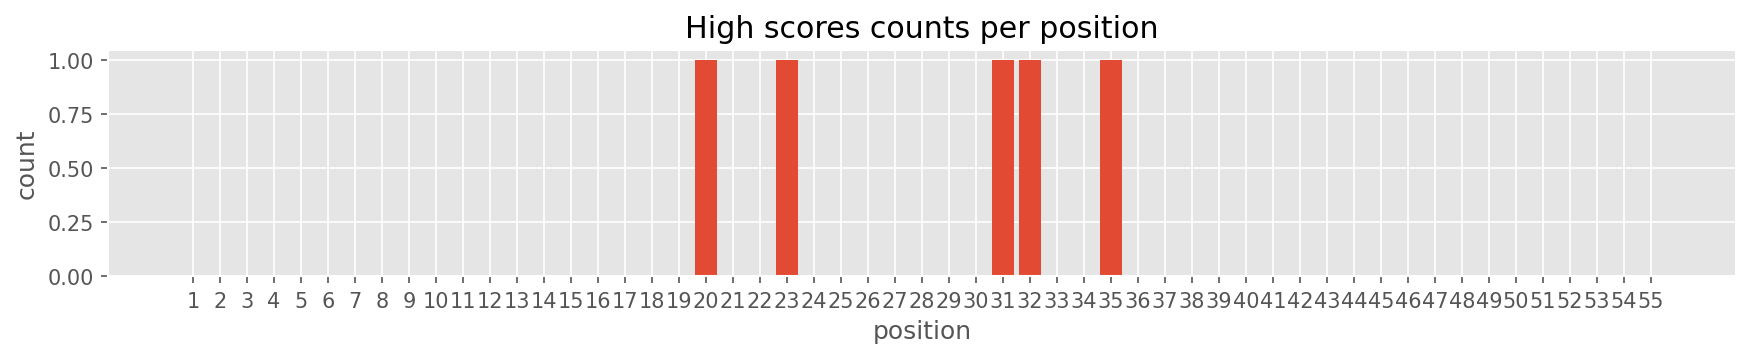

High score histogram for seed 16
Most common location of the best motif hit in each sequence = 50


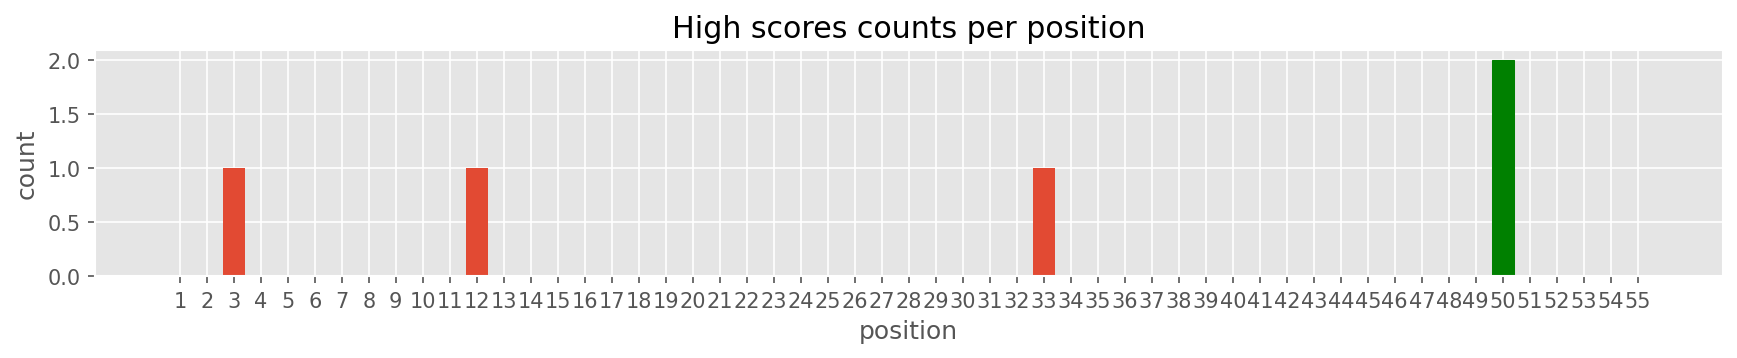

High score histogram for seed 17
Most common location of the best motif hit in each sequence = 11


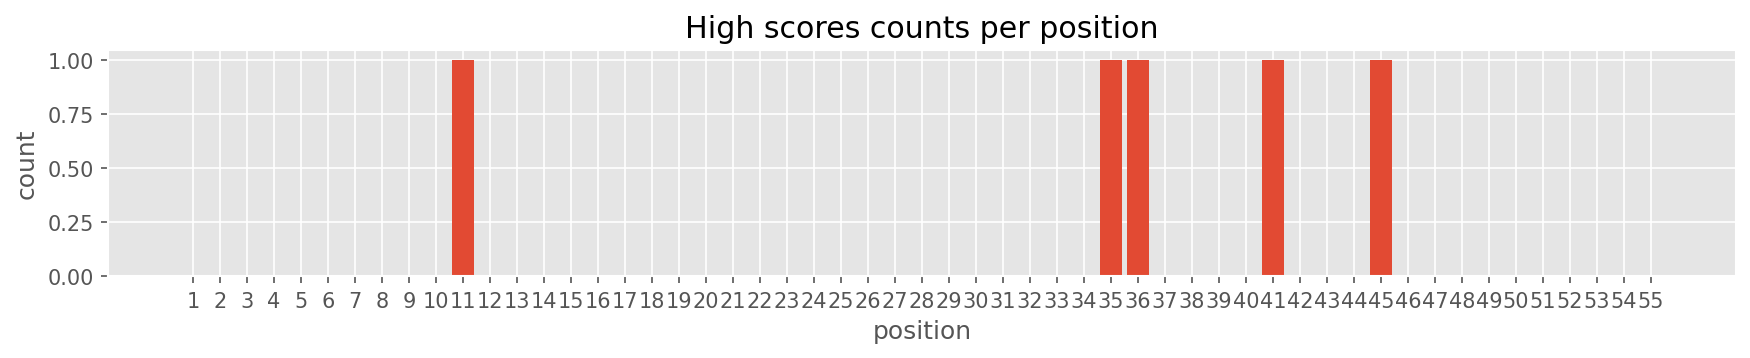

High score histogram for seed 18
Most common location of the best motif hit in each sequence = 16


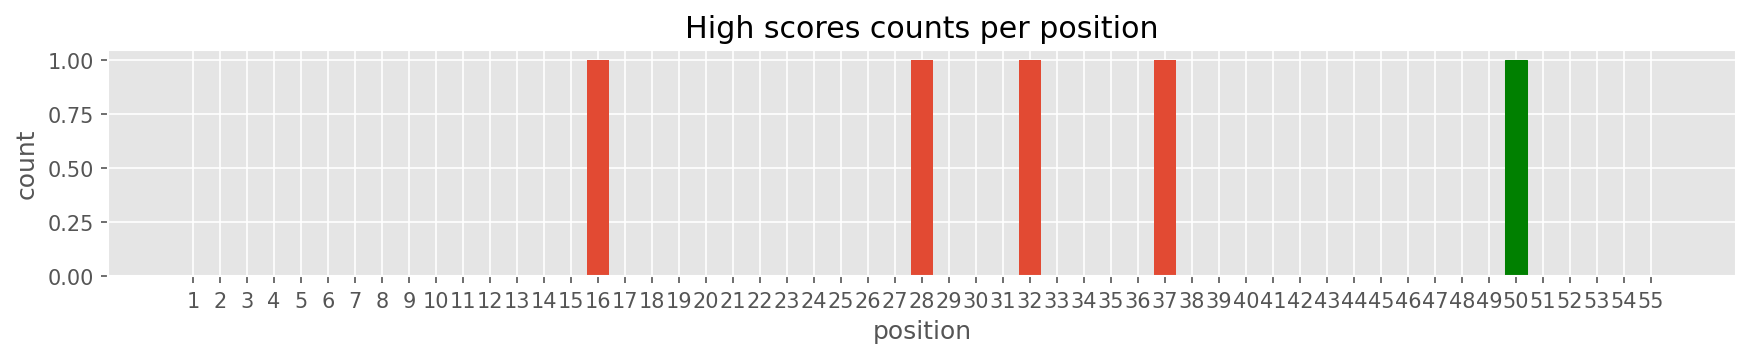

High score histogram for seed 19
Most common location of the best motif hit in each sequence = 18


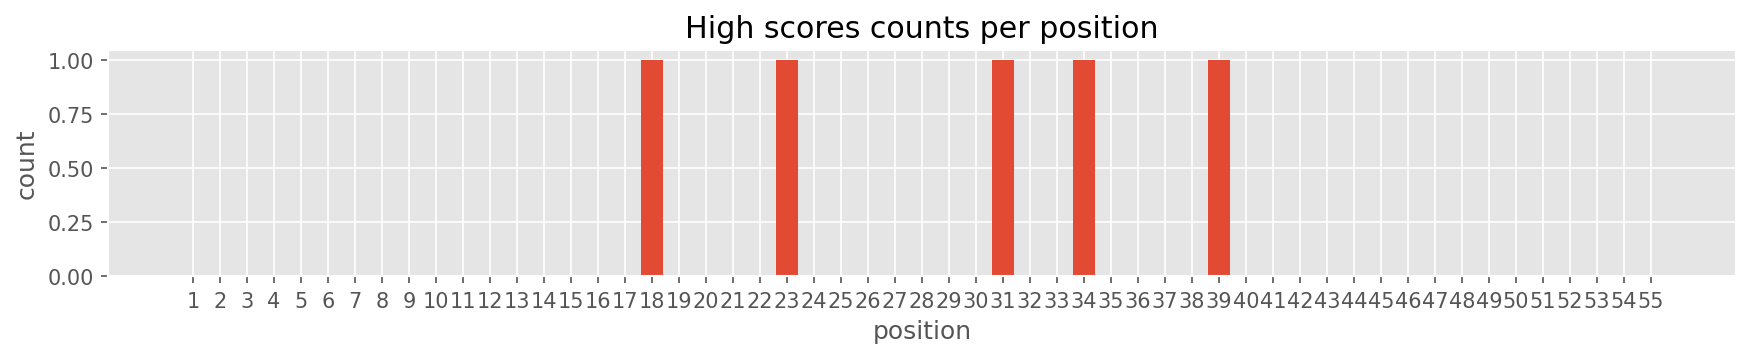

High score histogram for seed 20
Most common location of the best motif hit in each sequence = 2


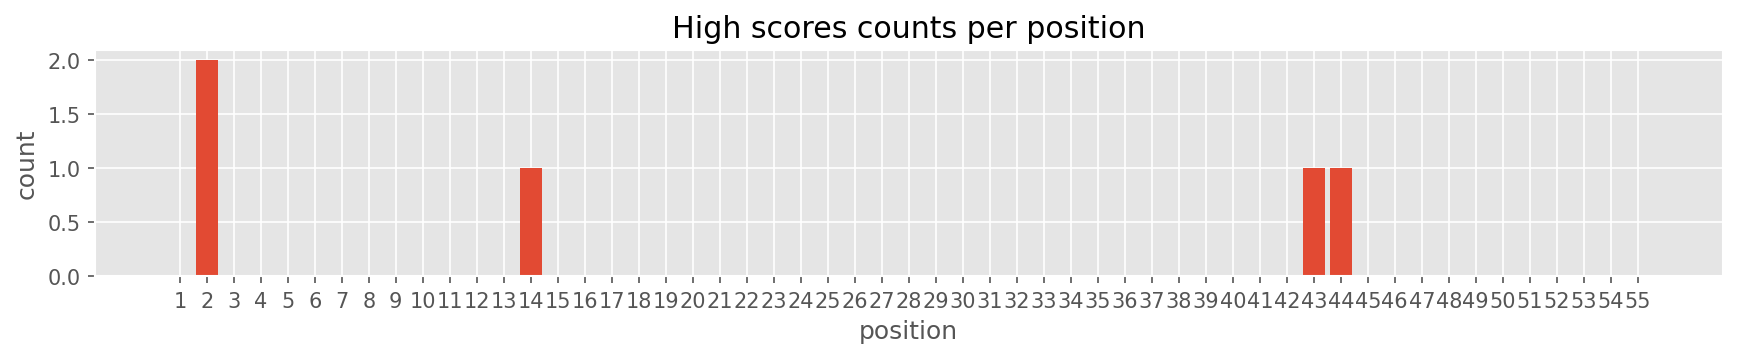

High score histogram for seed 21
Most common location of the best motif hit in each sequence = 9


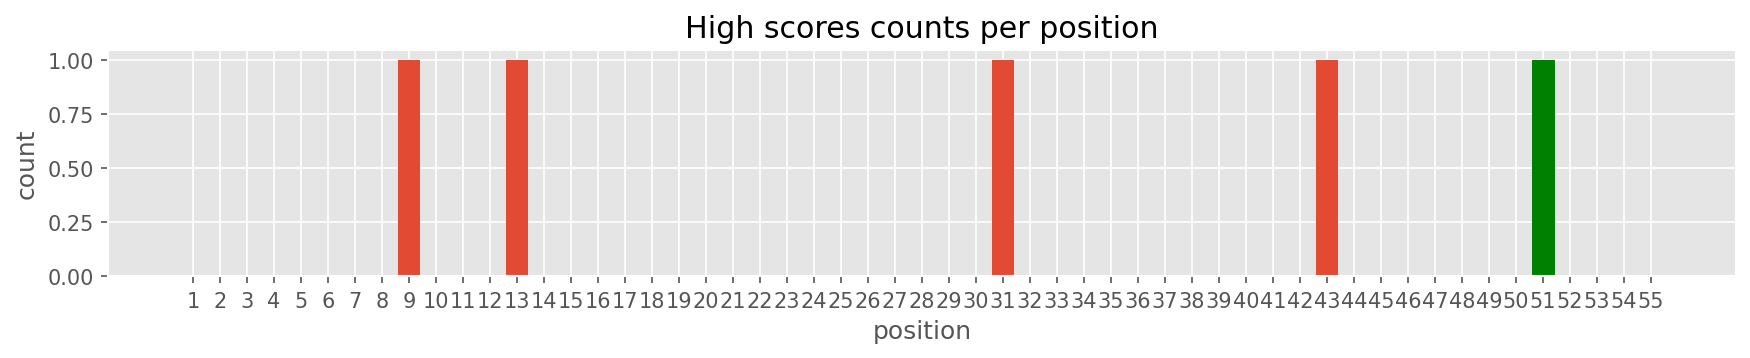

High score histogram for seed 22
Most common location of the best motif hit in each sequence = 11


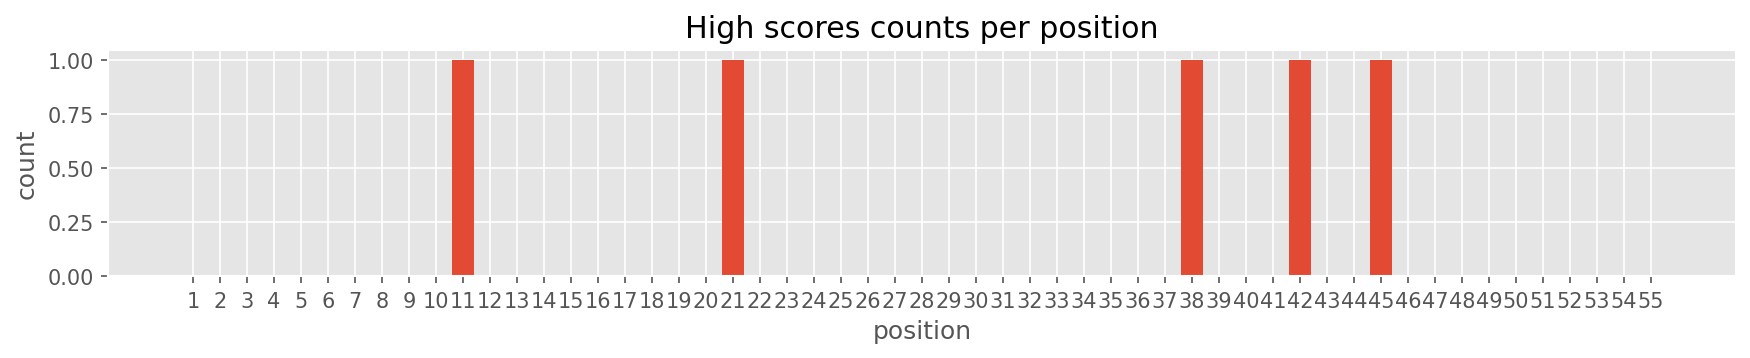

High score histogram for seed 23
Most common location of the best motif hit in each sequence = 5


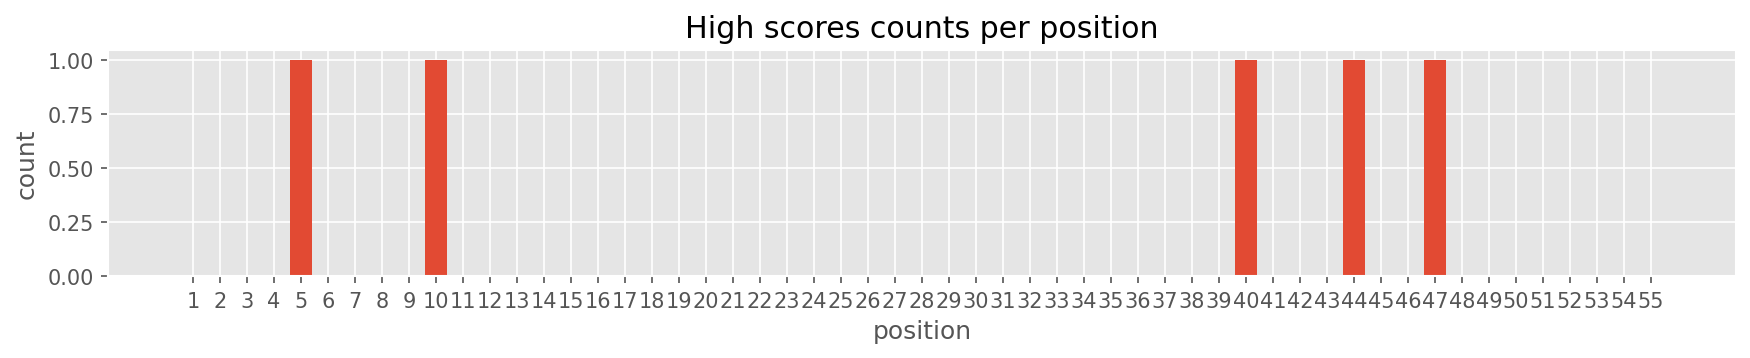

High score histogram for seed 24
Most common location of the best motif hit in each sequence = 12


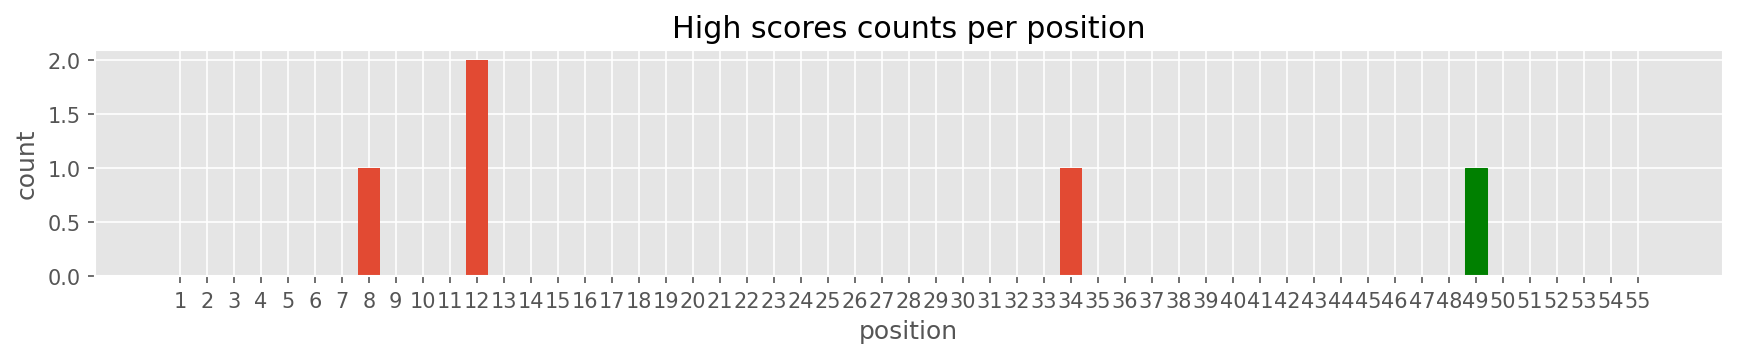

High score histogram for seed 25
Most common location of the best motif hit in each sequence = 51


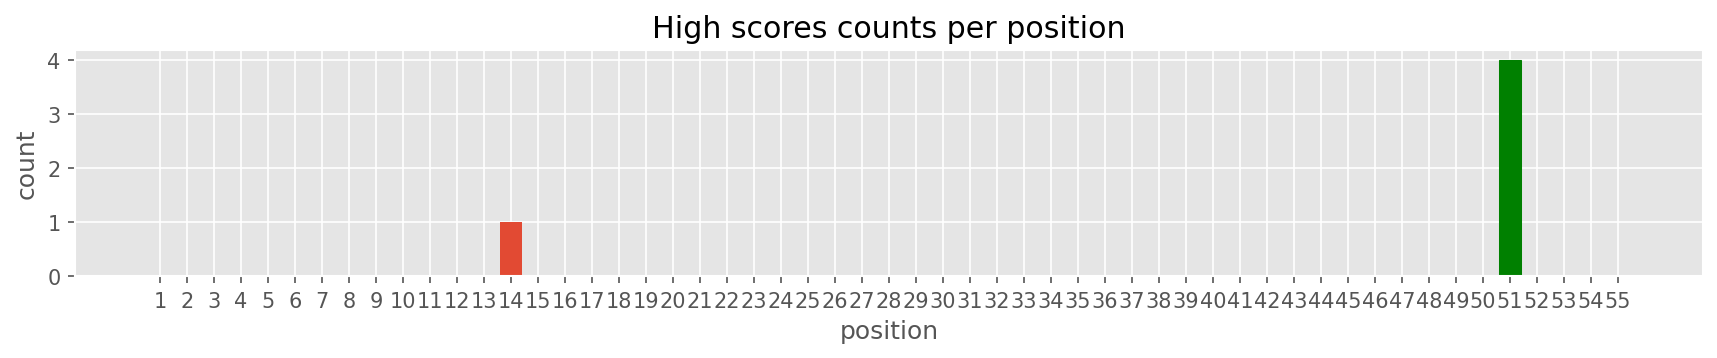

In [5]:

motif_pos = 51
gold_start, gold_end = eval.get_gold_positions(motif_pos, k)
print('gold_start, gold_end = ',gold_start, gold_end)
print('Gold sequence = ',sequences[0][50:51+k])
for i, eval in enumerate(evals):
    print(f'High score histogram for seed {i}')
    eval.plot_highscore_histogram(gold_start, gold_end)

# ROC Plot

In [8]:

from assignment3.roc import ROC
rocs = []

for i, eval in evals
y_score, y_true = eval.get_y(motif_pos)

r = ROC(y_true, y_score)
r.plot_roc()

In [10]:
print(f'AUC = {r.calculateAUC()}')

AUC = 0.9952


In [11]:
print('Thresholds',r.thresholds)
print('TPR',r.tprs)

Thresholds [  8.29453391   7.29453391   5.33473152   5.09917958   0.56586515
   0.48501398  -1.48716505  -1.50117998  -1.92040653  -1.98694636
  -2.93178967  -3.04941735  -4.19008533  -4.24243389  -4.62076861
  -4.73263041  -6.28012714  -6.28281097  -6.40423024  -6.42894826
  -7.2649607   -7.31951183  -7.76626361  -7.76681972  -7.86131301
  -7.86617676  -8.26167131  -8.41199349  -9.15846749  -9.23713972
  -9.26228005  -9.30367955  -9.31847041  -9.32851591  -9.49701668
  -9.56961862 -10.07698619 -10.38815691 -11.14812066 -11.15298441
 -11.95319264 -11.99240857 -12.63758233 -12.74524738 -16.82469894]
TPR [0.  0.8 0.8 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1. ]


In [12]:
t = r.largest_thres_TPR1()
print(f'Largest Threshold for TPR 1 = {t:.3f}')

Largest Threshold for TPR 1 = 5.099


In [13]:
tp, fp, tn, fn = r.get_TP_FP_TN_FN(t)
print('At threshold {:.3f} tp = {}, fp = {}, tn = {}, fn = {}'.format(t, tp, fp, tn, fn))

At threshold 5.099 tp = 5, fp = 4, tn = 246, fn = 0
